# Изучение закономерностей, определяющих успешность игр

**Цель проекта -** выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Для этого:

- Проведем исследовательский анализ данных;
- Составим портерет пользователя каждого региона;
- Проверим гипотезы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
*В качестве датасета используются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы полученные из открытых источников за 2016.*

>**Примечание:**  
>
>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Ход исследования:**

1. Обзор данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Составление портерета пользователя каждого региона;
5. Проверка гипотез.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
pd.set_option("display.precision", 2)
sns.set(rc={'figure.figsize':(12, 6)})
sns.set(rc={'figure.dpi': 200})

In [3]:
df = pd.read_csv('games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Согласно документации к данным:**  
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


### Вывод

**В данных выявлены следующие проблемы:**  
- Имеются пропуски, больше всего в столбцах Critic_Score, User_Score, Rating;
- Название столбцов в верхнем регистре;
- Неправильный тип данных в некоторых столбцах.

## Предобработка данных

***Что бы предобработать данные, выполним следующие действия:***  
- Приведем название столбцов к нижнему регистру;
- Преобразуем типы данных;
- Обработаем пропуски;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Приведение названия столбцов к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()

### Преобразование типов данных

In [8]:
convert = {'name': 'string', 
           'platform': 'string',
           'genre': 'category'
          }

In [9]:
df = df.astype(convert)

In [10]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [11]:
df['rating'] = pd.Categorical(df['rating'], categories=['EC', 'E', 'E10+', 'T', 'M', 'AO'], ordered=True)

- "K-A" ("Kids to Adults") - устаревший рейтинг, заменен на E;  
- «RP» («Rating Pending») — «Рейтинг ожидается», заменен на NaN, так как отсутствие рейтинга одно и тоже что и пропуск.

In [12]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

***Преобразовать столбец user_score сразу не получится т.к. присутствует строковый тип данных. Строка tbd что значит "To Be Determined" т.е. рейтинг еще не определен. Для дальнейшей работы tbd будет преобразован в NaN.***

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [15]:
df['user_score'] = df['user_score'].astype('float')

### Обработка пропусков

In [16]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6769
dtype: int64

***Обработаем пропуски в name***

In [17]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,<NA>,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Так как пропуска всего 2, удалим эти строчки, вместе с этим уйдут пропуски и в genre.*

In [18]:
df = df.drop(df[df['name'].isna()].index)

***Обработаем пропуски в year_of_release***

In [19]:
df[df['year_of_release'].isna()]['name'].count() / len(df)

0.016095255190570215

*Так как пропуски составляют всего 1.6% от датасета, просто удалим их.*

In [20]:
df = df.drop(df[df['year_of_release'].isna()].index)

***Обработаем пропуски в critic_score***

In [21]:
df['critic_score'] = df['critic_score'].fillna(
    df.groupby(['genre', 'platform'])['critic_score'].transform('median')
)

In [22]:
df[df['critic_score'].isna()]['name'].count() / len(df)

0.06756263682802238

*Пропуски были заполнены медианой по жанрам и платформам, к сожалению из-за недостаточного количества данных для группировки, все заполнить не удалось.*

***Обработаем пропуски в user_score***

In [23]:
df['user_score'] = df['user_score'].fillna(
    df.groupby(['genre', 'platform'])['user_score'].transform('median')
)

In [24]:
df[df['user_score'].isna()]['name'].count() / len(df)

0.06713694964728777

*Пропуски были заполнены медианой по жанрам и платформам, но остались незаполненные пропуски.*

***Удалим те данные где остались пропуски в critic_score и user_score***

In [25]:
before = len(df)

In [26]:
df = df.dropna(subset=['critic_score', 'user_score'])

In [27]:
df = df.reset_index(drop=True)

In [28]:
1 - len(df) / before

0.06756263682802233

*В результате удаления датасет сократился на 6.75% .*

***Обработаем пропуски в rating***

*Заполним пропуски максимальным рейтингом каждого жанра, чтобы ребенку не попала игра со взрослым рейтингом.*

In [29]:
df['rating'] = df['rating'].fillna(df.groupby('genre')['rating'].transform('max'))

In [30]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Подсчет суммарных продаж во всех регионах 

In [31]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [32]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1617,WWE SmackDown vs. Raw 2011,PS3,2010-01-01,Fighting,0.44,0.46,0.01,0.18,74.0,6.9,T,1.09


### Вывод

**В результате предобработки:**

- Названия столбцов были приведены к нижнему регистру;
- Изменены типы данных в следующих столбцах:
    - name в `string`; 
    - platform в `string`;
    - genre в `category`;
    - столбец genre в `category` со следующими категориями `EC, E, E10+, T, M, AO`;
    - year_of_release в формат даты;
    - в столбце user_score присутствовала строка `tbd` что значит "To Be Determined" т.е. рейтинг еще не определен. Для дальнейшей работы tbd был преобразован в `NaN`, а после весь столбец в `float`.
- Обработаны пропуски. Хотелось бы отметить что из-за недостаточного количества данных для группировки в стобцах critic_score и user_score, все заполнить не удалось и 6.75% данных были удалены; 
- Добавлен столбец с суммарными продажами во всех регионах.

## Исследовательский анализ данных

***Выясним:***

- Сколько игр выпускалось в разные годы?
- Как менялись продажи по платформам?
- Характерный срок появления новых и исчезновения старых платформ;
- Какие платформы лидируют по продажам, растут или падают?
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- Общее распределение игр по жанрам.

### Динамика выпуска игр за разные года

In [33]:
games_count_by_year = df.pivot_table(index='year_of_release', 
                                     values='name', 
                                     aggfunc='count'
                                    ).rename(columns={'name': 'games_count'})

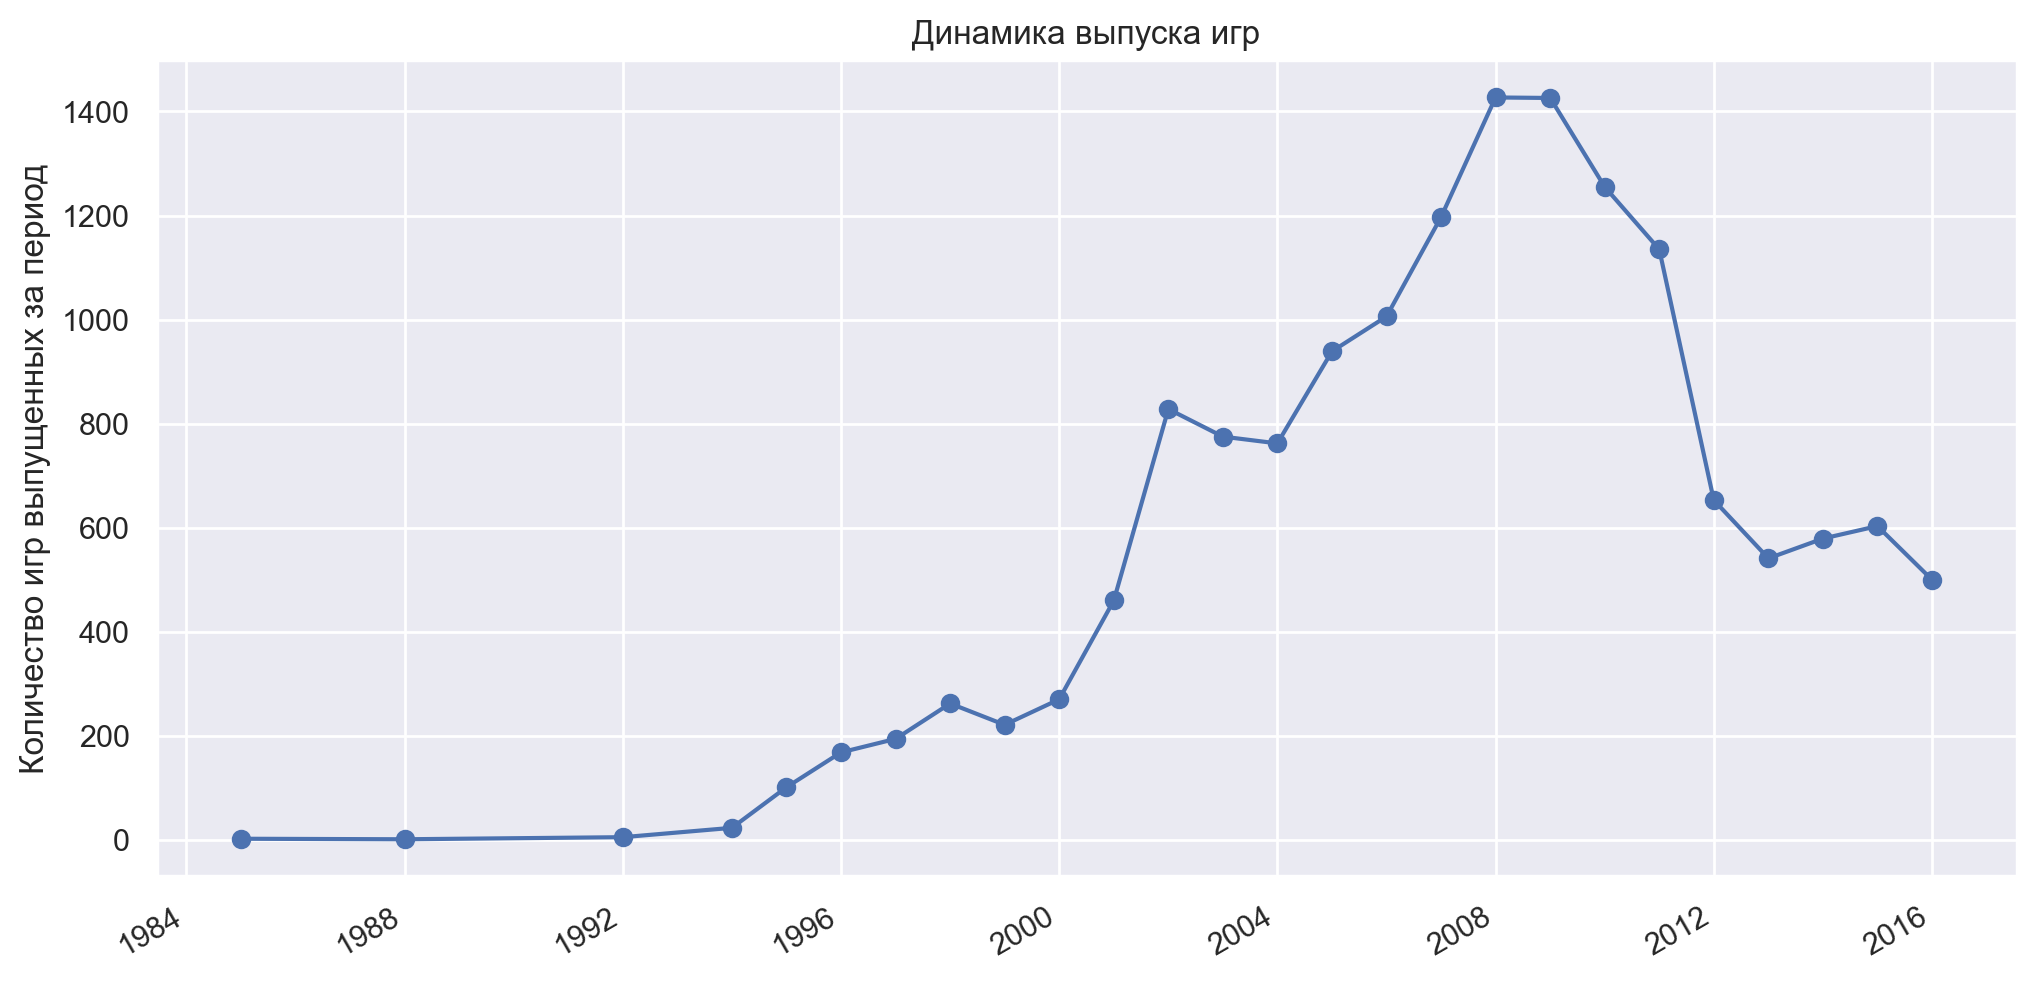

In [34]:
games_count_by_year.plot(style='o-')
plt.title('Динамика выпуска игр')
plt.xlabel('')
plt.ylabel('Количество игр выпущенных за период')
plt.legend().set_visible(False);

*Наблюдается подъем выпуска игр с 1992 года, пик достигается в 2009 году, после идет спад и некая стабилизация с 2013 года, данный период стабильности и будет выбран для прогнозирования, как актуальный.*

In [35]:
actual_df = df.query('year_of_release >= "2013"')

### Динамика продаж по платформам

In [36]:
games_sales_by_platform = (actual_df
                           .pivot_table(index=['platform', 'year_of_release'],
                                        values='all_sales',
                                        aggfunc='sum'
                                       )
                           .unstack()
                          )

In [37]:
games_sales_by_platform.columns = ['2013', '2014', '2015', '2016']

In [38]:
games_sales_by_platform = (games_sales_by_platform
                             .assign(sum=games_sales_by_platform.sum(axis=1))
                             .sort_values(by='sum', ascending=False)
                             .drop('sum', axis=1)
                             .head(10)
                          )

***Узнаем динамику продаж***

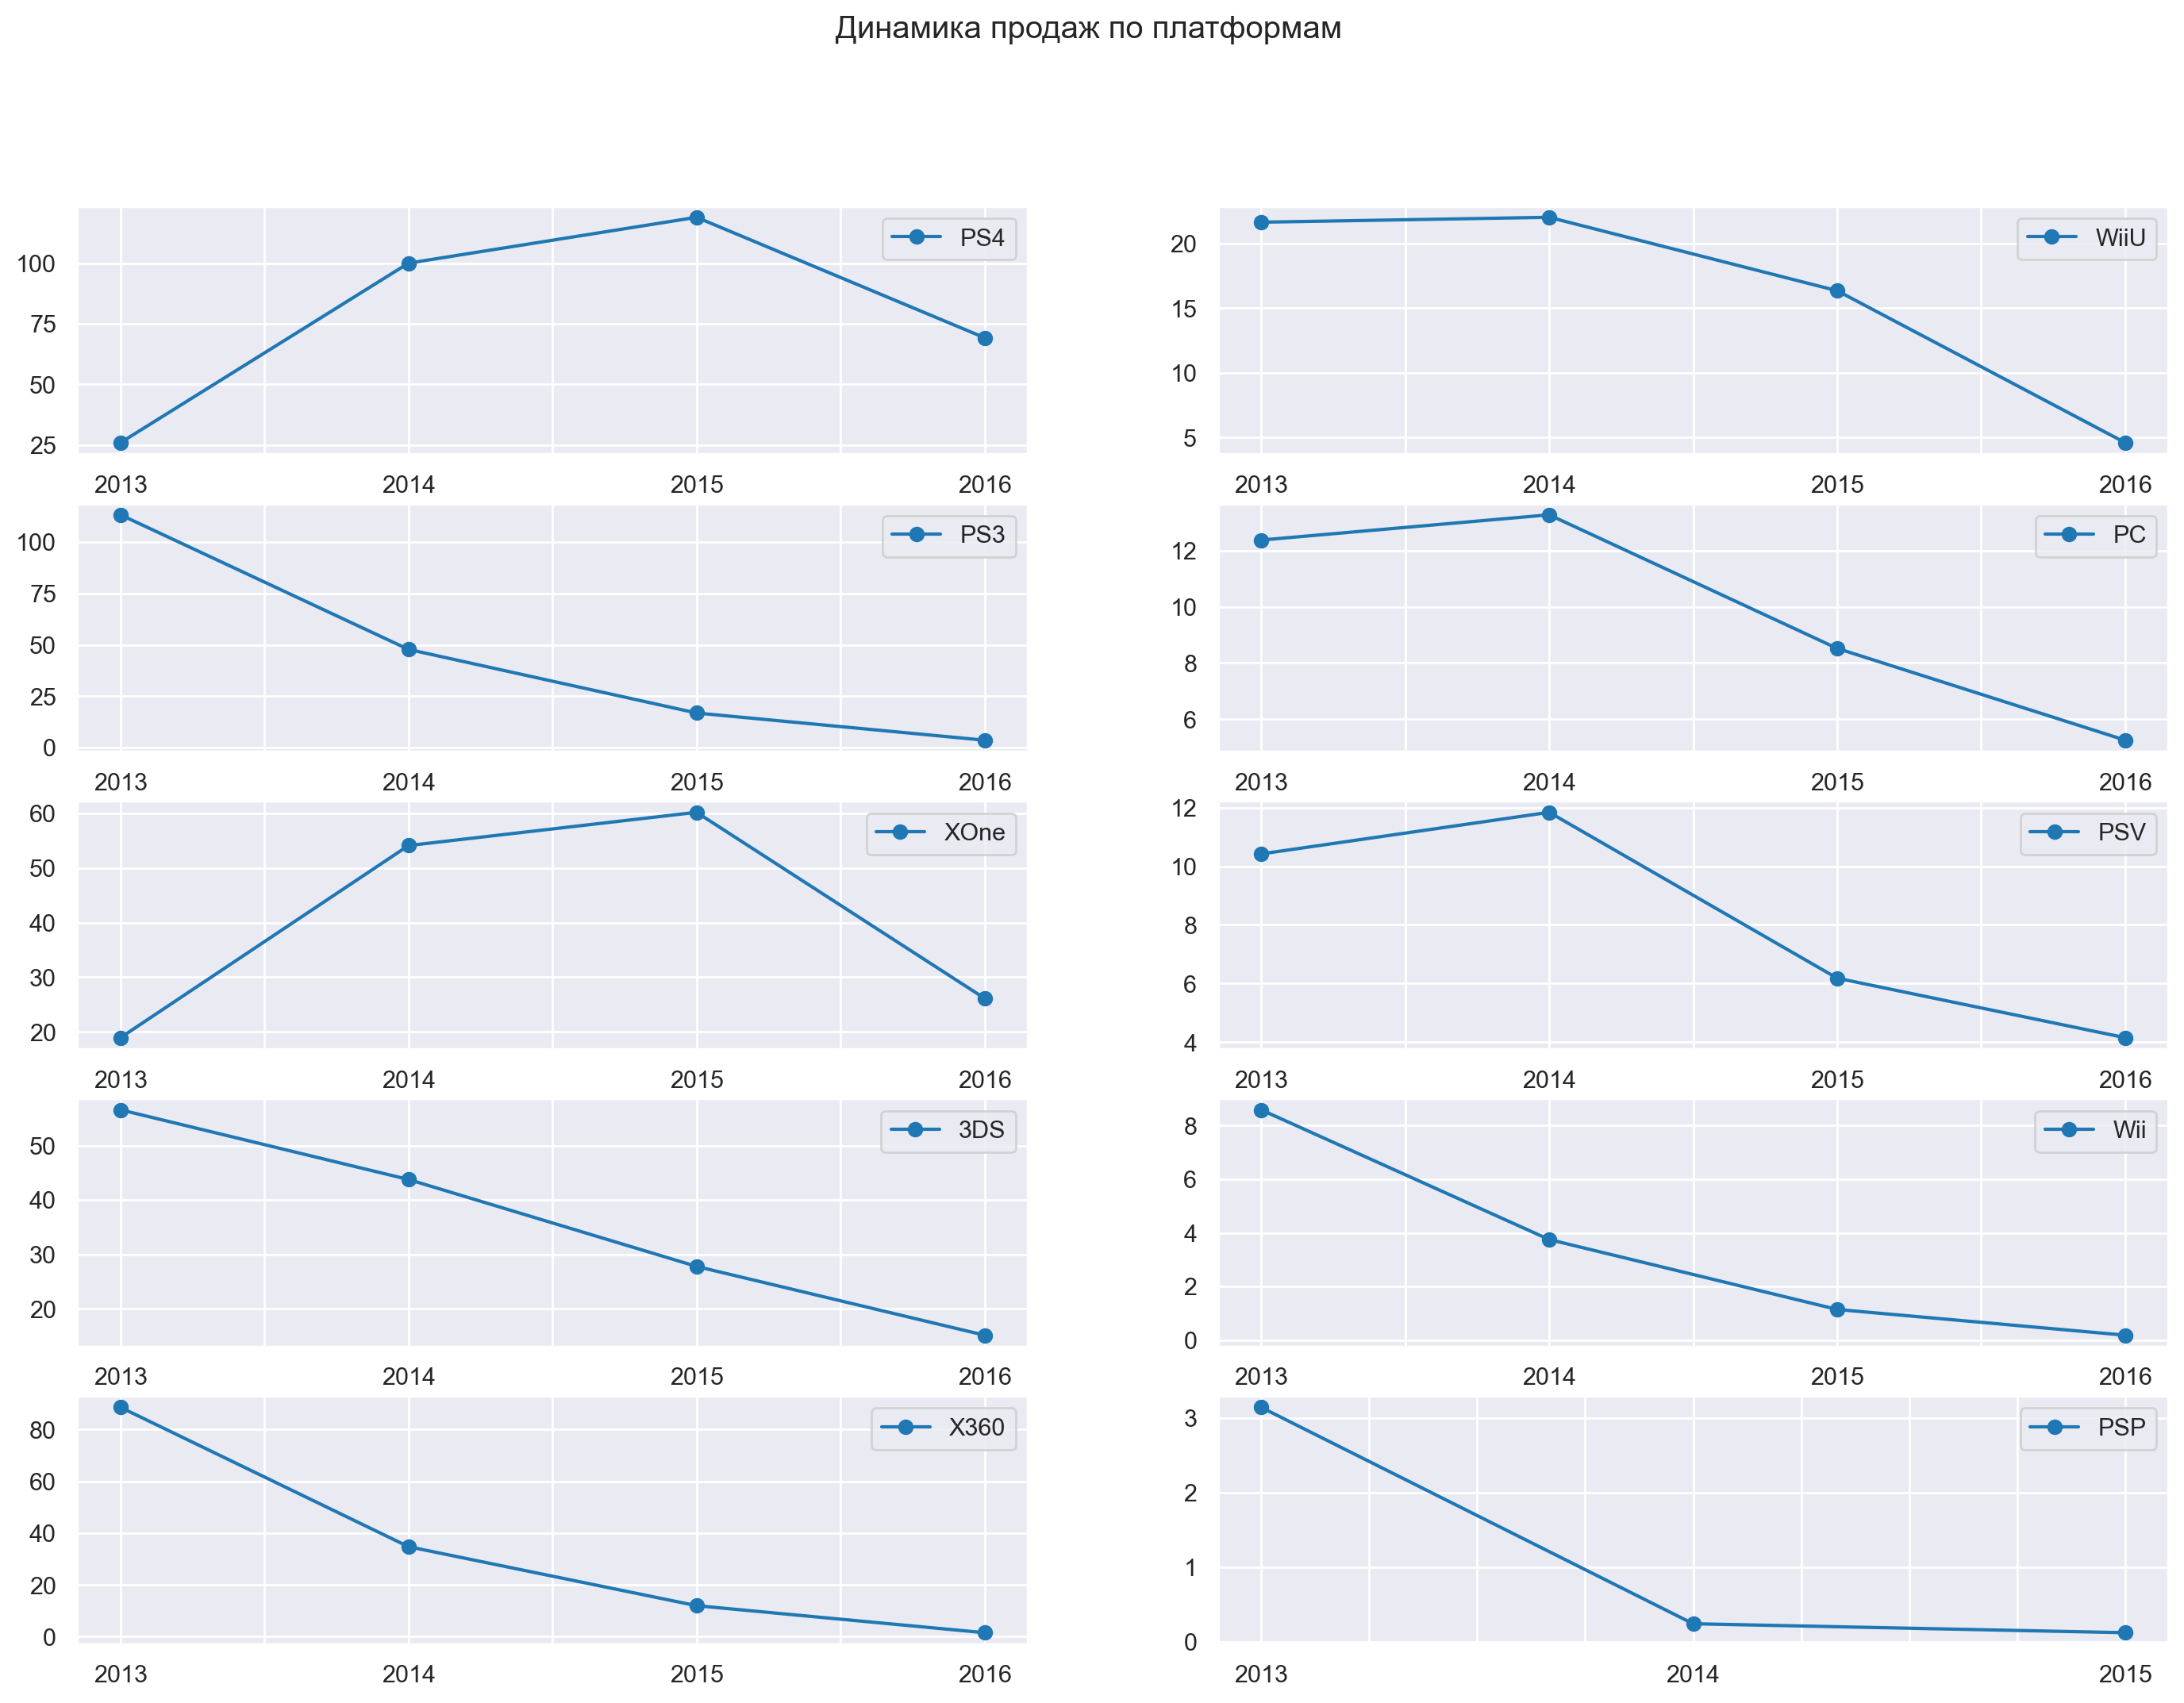

In [39]:
row = 5
col = 2

fig, ax = plt.subplots(row, col, figsize=(17, 12))
fig.suptitle('Динамика продаж по платформам')

counter = 0

for x in range(col):
    for z in range(row):
        games_sales_by_platform.iloc[counter].plot(style='o-', 
                                               ax=ax[z][x], 
                                               legend=games_sales_by_platform.iloc[counter].name, colormap='tab20' 
                                              )
        counter += 1

*За актальный период росли только две платформы PS4 и XboxOne, как раз 2013 год приходится на момент их выпуска, но с 2015 динамика идет на понижение так же как и у остальных платформ.*

### Характерный срок появления новых и исчезновения старых платформ

In [40]:
platform_live_period = (df
                        .pivot_table(index=['platform', 'year_of_release'], values='name', aggfunc='count')
                        .unstack()
                       )

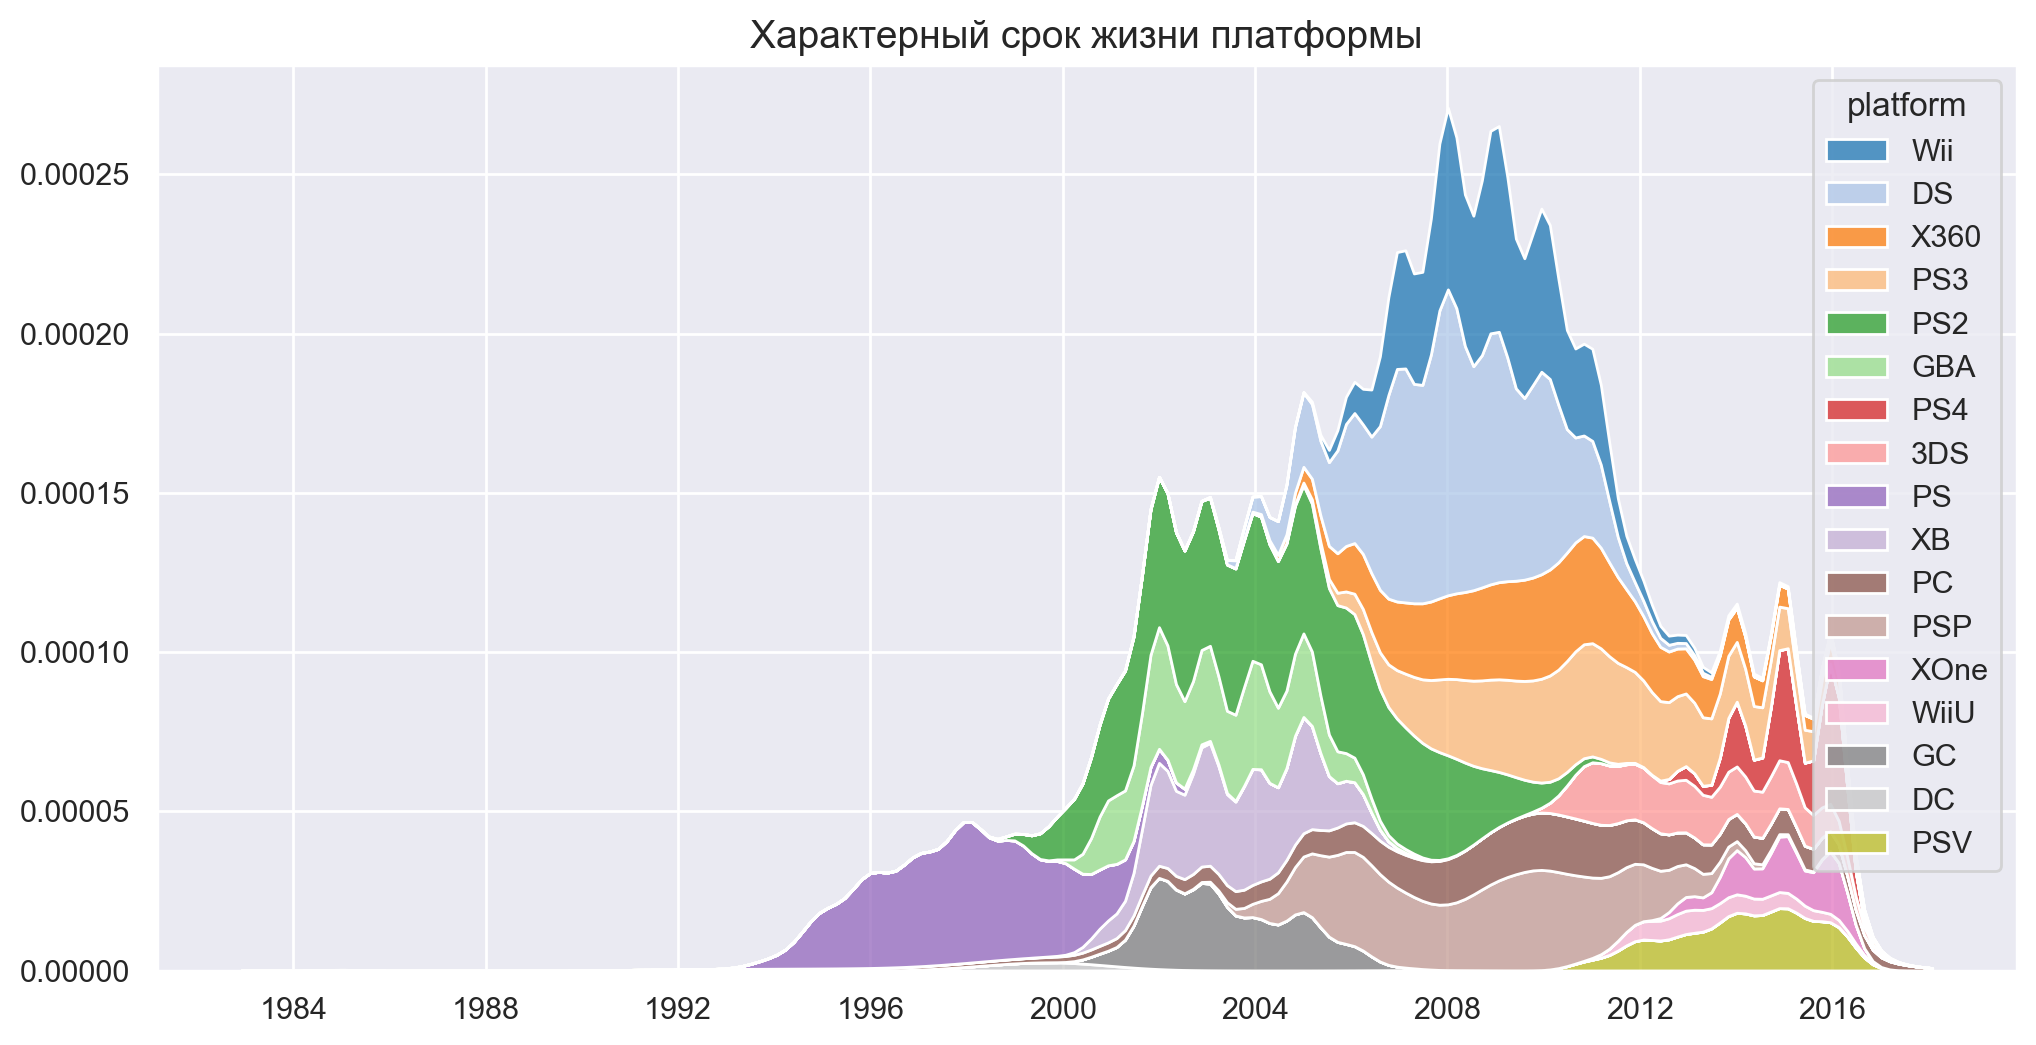

In [41]:
sns.kdeplot(df['year_of_release'], hue=df['platform'], multiple='stack', palette='tab20')
plt.xlabel('')
plt.ylabel('')
plt.title('Характерный срок жизни платформы', fontsize=14);

In [42]:
platform_live_period.count(axis=1).mean()

9.470588235294118

*Характерный средний срок жизни платформы 9.5 лет.*

### Платформы лидирующие по продажам

***Получим топ платформ за актуальный период***

In [43]:
top_platform = (actual_df
                 .pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum')
                 .reset_index()
               )

In [44]:
top_platform_sales = (top_platform
                        .groupby('platform')['all_sales']
                        .sum()
                        .sort_values(ascending=False)
                        .to_frame()
                     )

***Узнаем потенциально прибыльные***

In [45]:
def barchart(data, x, y, title='', xlabel='', ylabel='', hue=None):
    """
        data - датафрейм
        x - столбец который будет использован для оси х
        y - столбец который будет использован для оси у
        title - заголовок графика
        xlabel - подпись оси х
        ylabel - подпись оси у
        hue - столбец для разбивки по цвету
        
    """
    sns.barplot(data=data, x=x, y=y, hue=hue)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

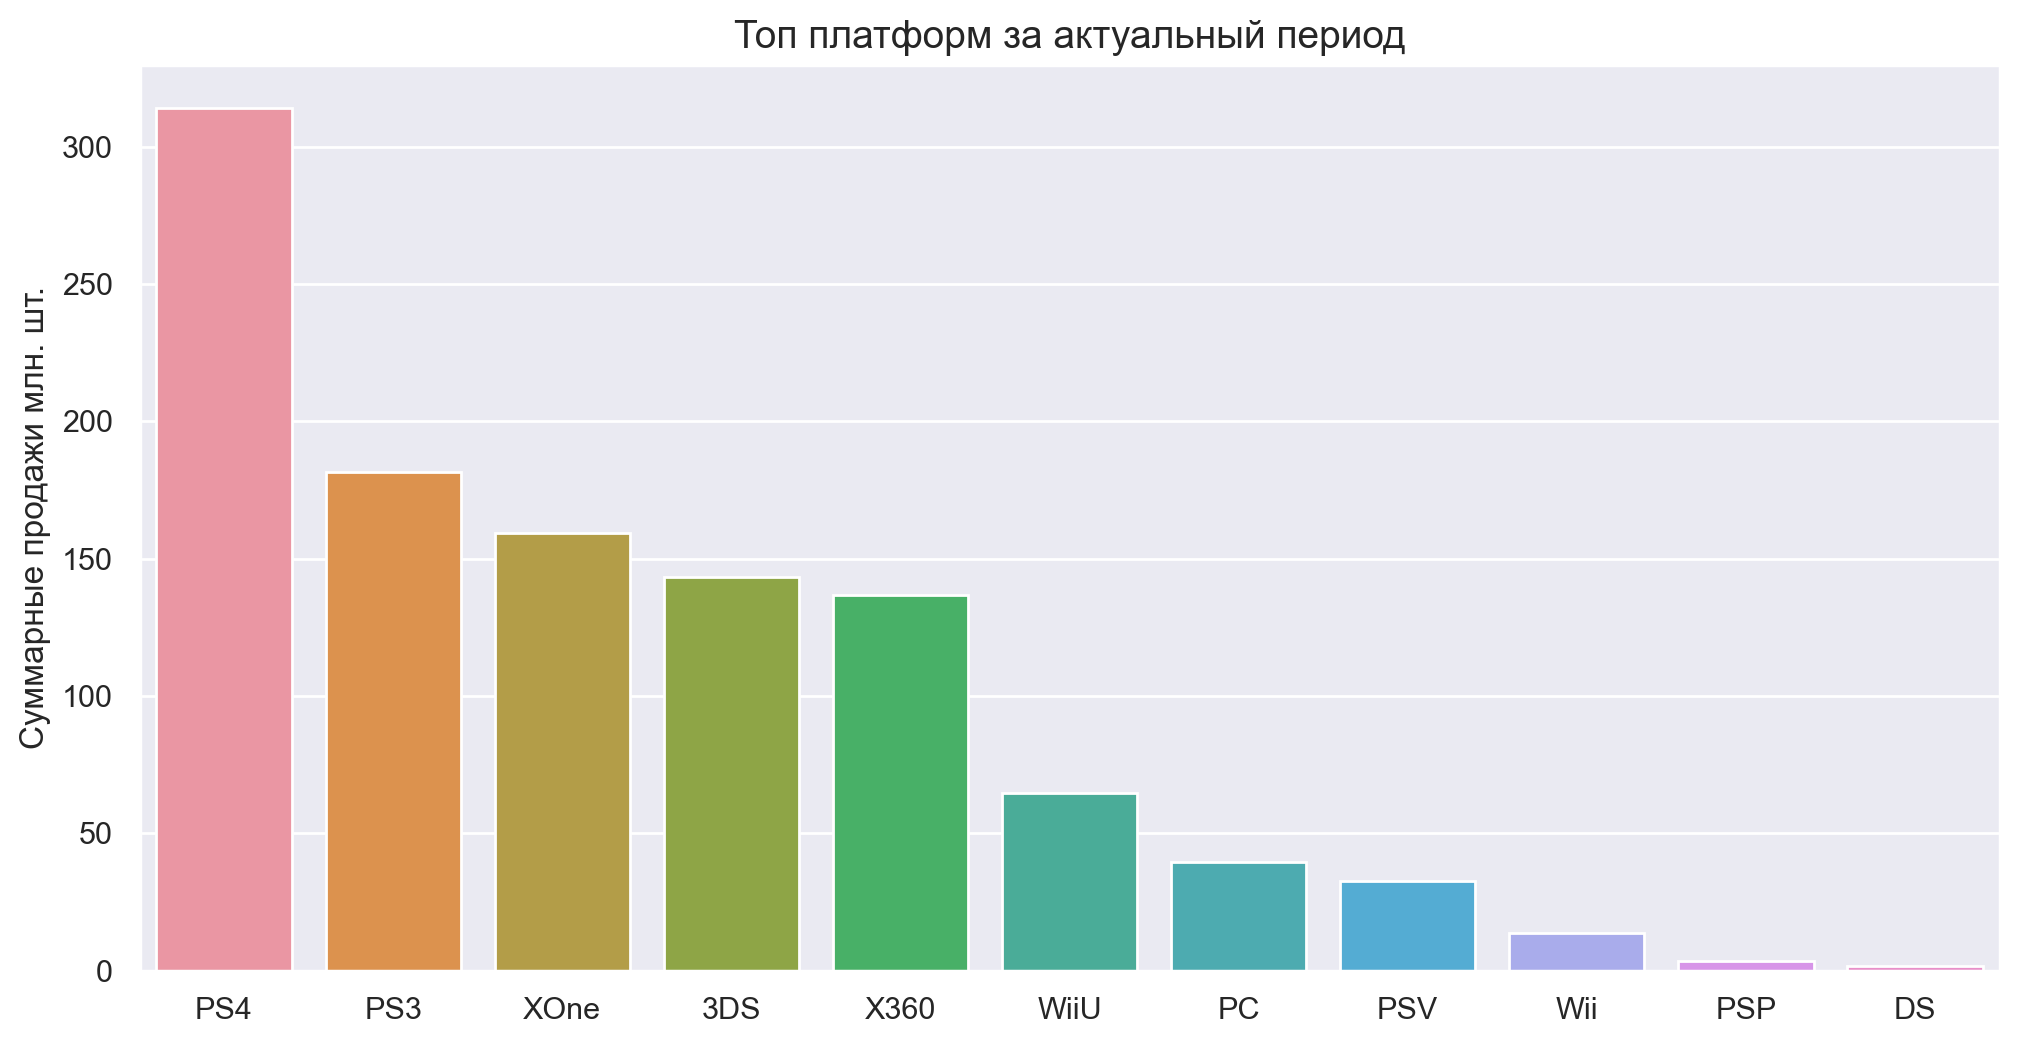

In [46]:
barchart(data=top_platform_sales, 
         x=top_platform_sales.index, 
         y='all_sales',
         title='Топ платформ за актуальный период',
         ylabel='Суммарные продажи млн. шт.')

*Самыми прибыльными оказались PS4, PS3, XOne, 3DS, X360, подкачали продажи у PC, хотя это самая старая платформа в этом наборе данных, скорее всего роль сыграло легкодоступность пиратских копий для нее.*

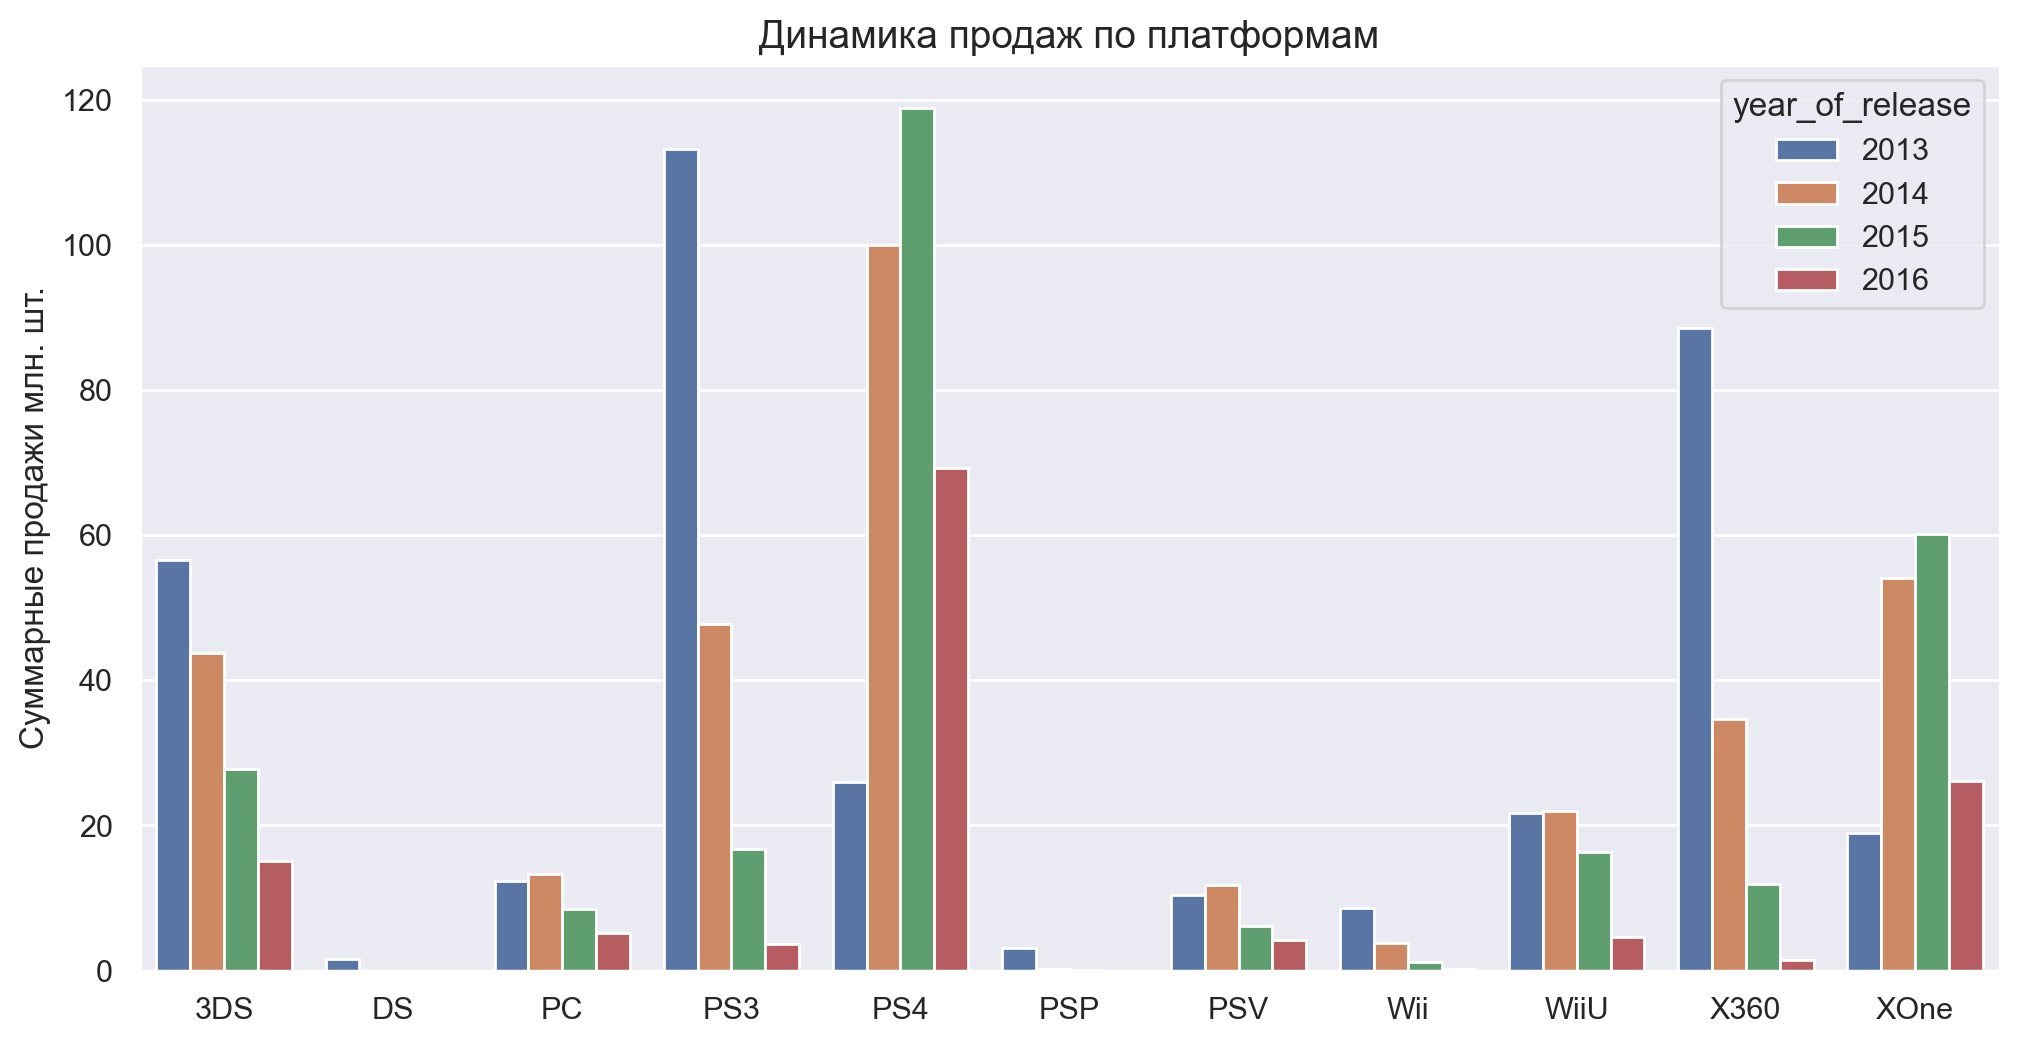

In [47]:
barchart(data=top_platform, 
         x='platform', 
         y='all_sales', 
         title='Динамика продаж по платформам',
         ylabel='Суммарные продажи млн. шт.', 
         hue=top_platform.year_of_release.dt.year
        )

*Рост наблюдался только у PS4 и XOne, так как это самые новые консоли в представленном наборе данных, но в 2016 году они так же показали снижение, все остальные платформы падают от года к году.*

***В качестве потенциально прибыльных платформ выберем PS4, XOne, 3DS, WiiU, PC, они являются самыми актуальными на 2016 год, у остальных платформ заканчивается срок поддержки.***

In [48]:
profitable_platforms = actual_df[actual_df['platform'].isin(['PS4', 'XOne', '3DS', 'WiiU', 'PC'])]
profitable_platforms = profitable_platforms.reset_index(drop=True)

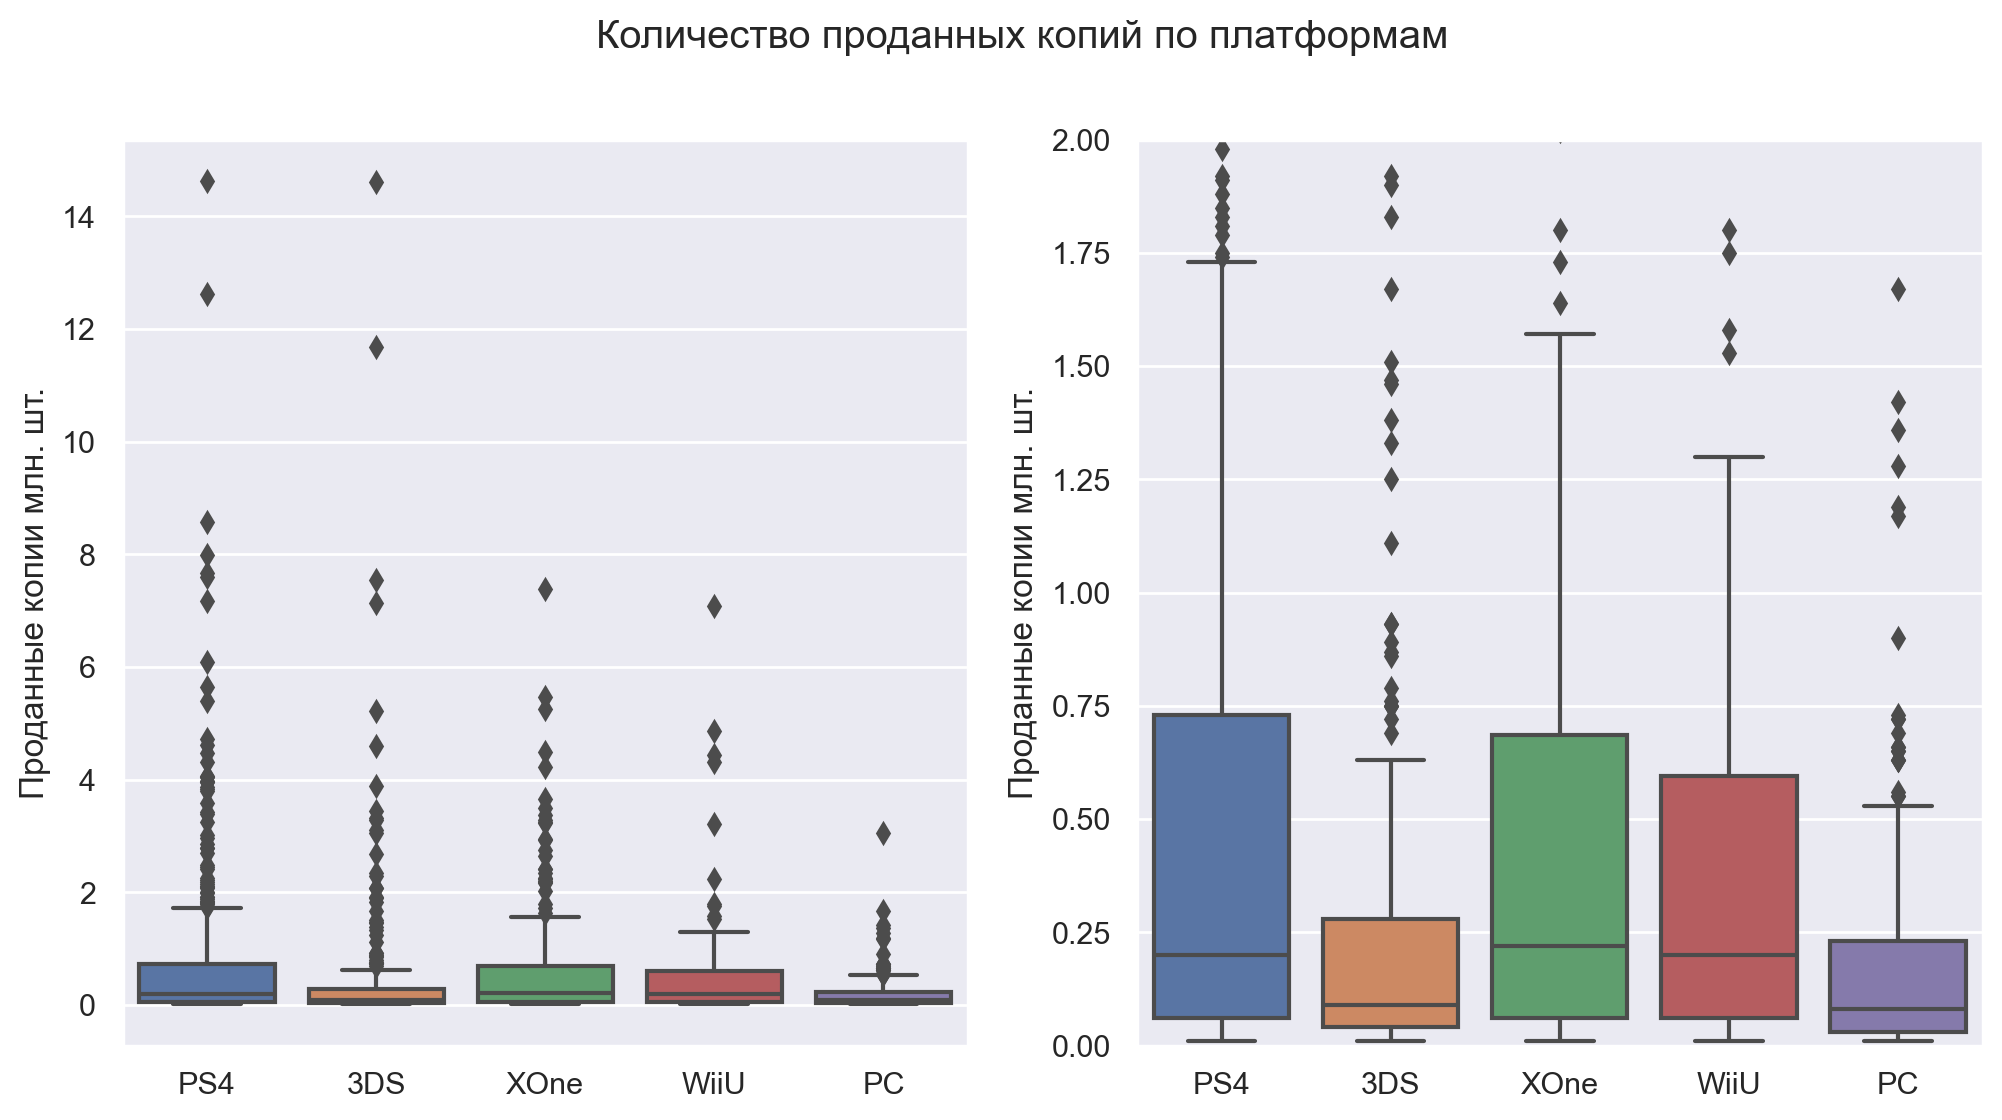

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Количество проданных копий по платформам')

sns.boxplot(data=profitable_platforms, x='platform', y='all_sales', ax=ax1)
ax1.set_ylabel('Проданные копии млн. шт.')
ax1.set_xlabel('')

sns.boxplot(data=profitable_platforms, x='platform', y='all_sales', ax=ax2)
ax2.set_ylabel('Проданные копии млн. шт.')
ax2.set_xlabel('')
ax2.set_ylim(0, 2);

- Среднее во всех платформах больше чем медиана;
- Очень большое количество выбросов, на любой из представленных консолей продается больше игр чем на стационарный компьютер;
- Выбросы являются хитами продаж, узнать до выхода игры будет она хитом или нет практически невозможно, поэтому прогнозировать нужно на стабильных данных, в качестве точки отсечки возьмем 1.75 млн. проданных копий.

In [50]:
before = profitable_platforms.shape[0]

In [51]:
profitable_platforms = profitable_platforms.query('all_sales <= 1.75')

In [52]:
after = profitable_platforms.shape[0]

In [53]:
1 - after / before

0.0850722311396469

*Выборка сократилась на 8.5%*

###  Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

***В качестве самой популярной платформы выберем PS4, она самая новая и у нее самое большое количество продаж игри как видно из графика хитов выходит тоже больше.*** 

In [54]:
def scatterplot_nm(param, n=1, m=1, suptitle=''):
    """
        param - содержит словарь параметров, либо список словарей для нескольких графиков
        n - количество строк
        m - количество столбцов
        suptitle - заголовок фигуры
    
    """

    fig, ax = plt.subplots(n, m)

    fig.suptitle(suptitle, fontsize=14)
    

    param = np.array(param).reshape(n, m)
    for row in range(n):
        for col in range(m):
            sns.scatterplot(data=param[row][col].get('data', None), 
                            x=param[row][col].get('x', ''), 
                            y=param[row][col].get('y', ''), 
                            ax=(ax[row][col] if n + m > 2 else ax)
                           )
            (ax[row][col] if n + m > 2 else ax).set_title(param[row][col].get('title', ''), fontsize=14)
            (ax[row][col] if n + m > 2 else ax).set_ylabel(param[row][col].get('ylabel', ''))
            (ax[row][col] if n + m > 2 else ax).set_xlabel(param[row][col].get('xlabel', ''))

    plt.show()

In [55]:
ps = profitable_platforms[profitable_platforms['platform'] == 'PS4']

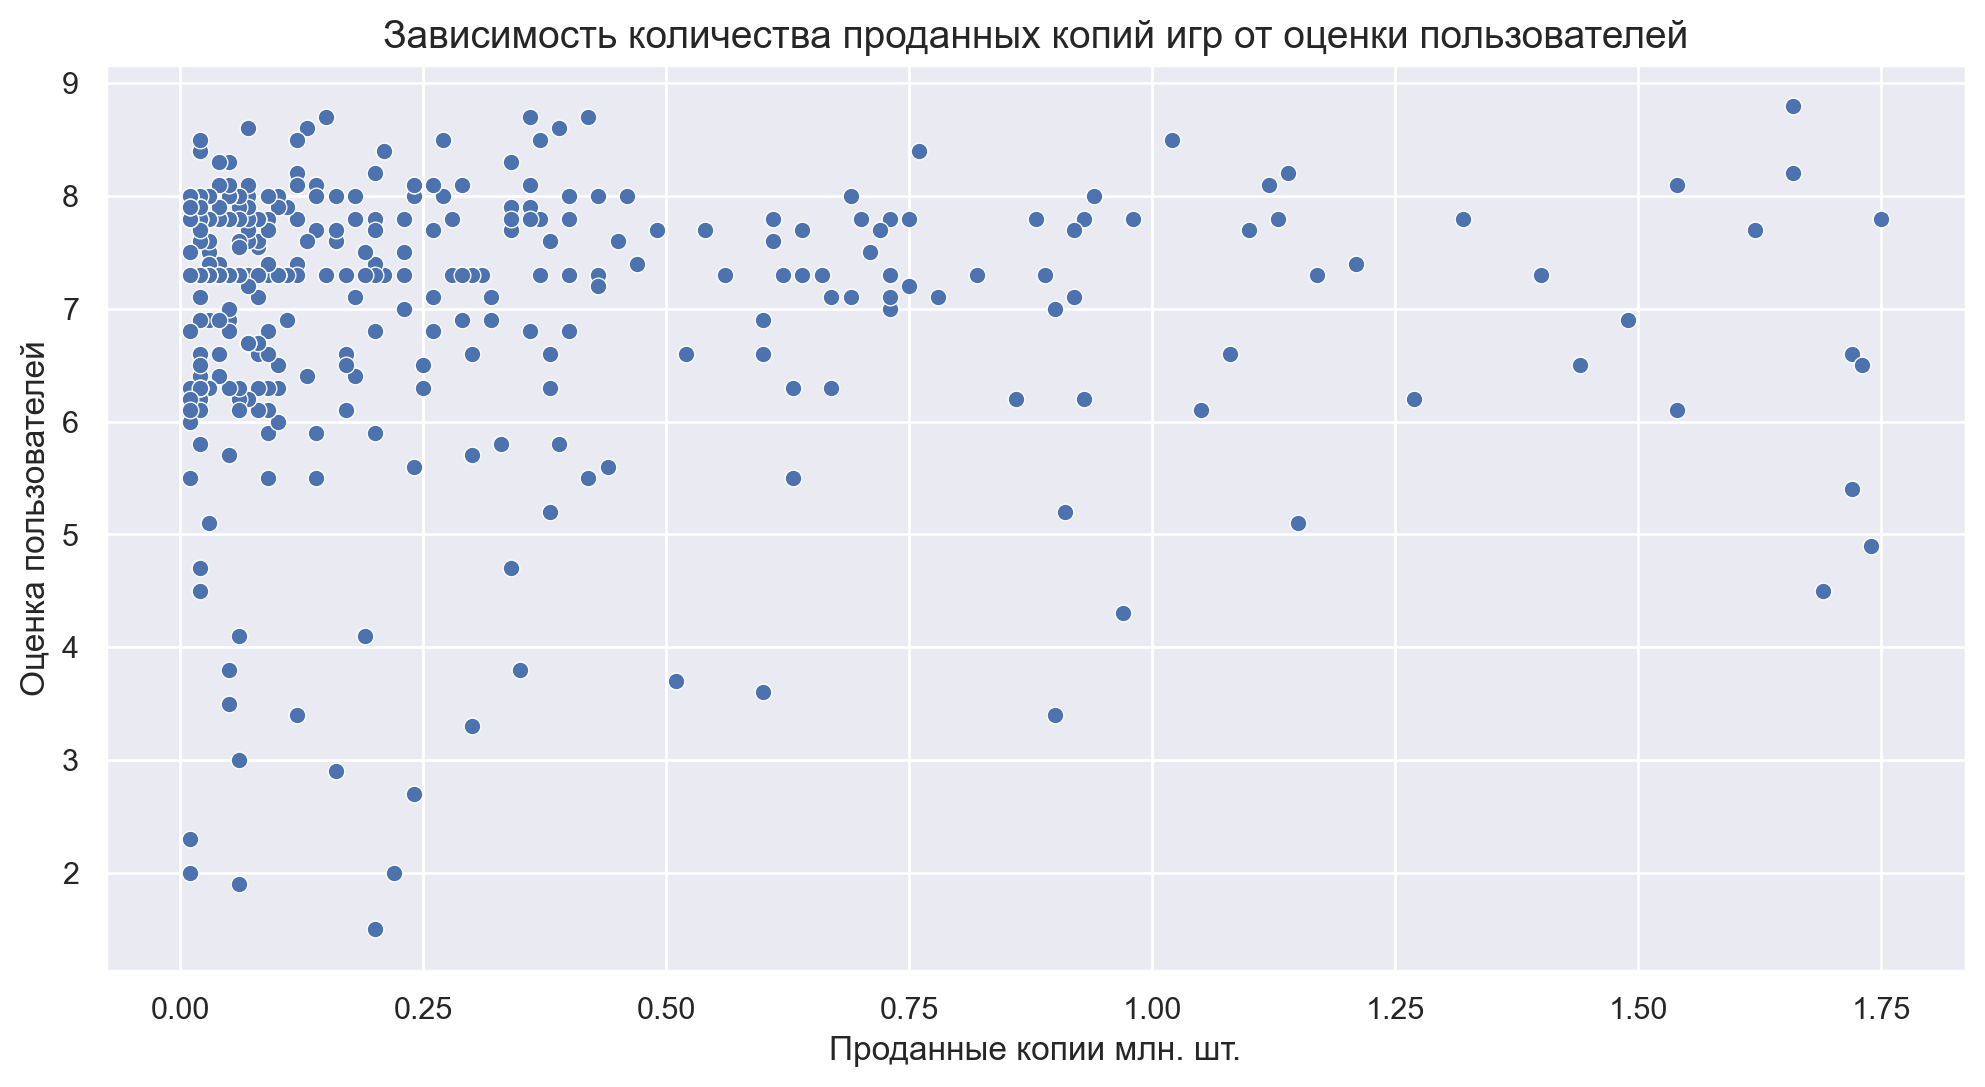

In [56]:
scatterplot_nm({'data': ps, 
                'x': 'all_sales', 
                'y': 'user_score', 
                'title': 'Зависимость количества проданных копий игр от оценки пользователей',
                'xlabel': 'Проданные копии млн. шт.',
                'ylabel': 'Оценка пользователей'}
              )

In [57]:
ps.all_sales.corr(ps.user_score)

-0.010383189618989286

*Корреляция количества проданных копий от оценки пользователей отсутствует.*

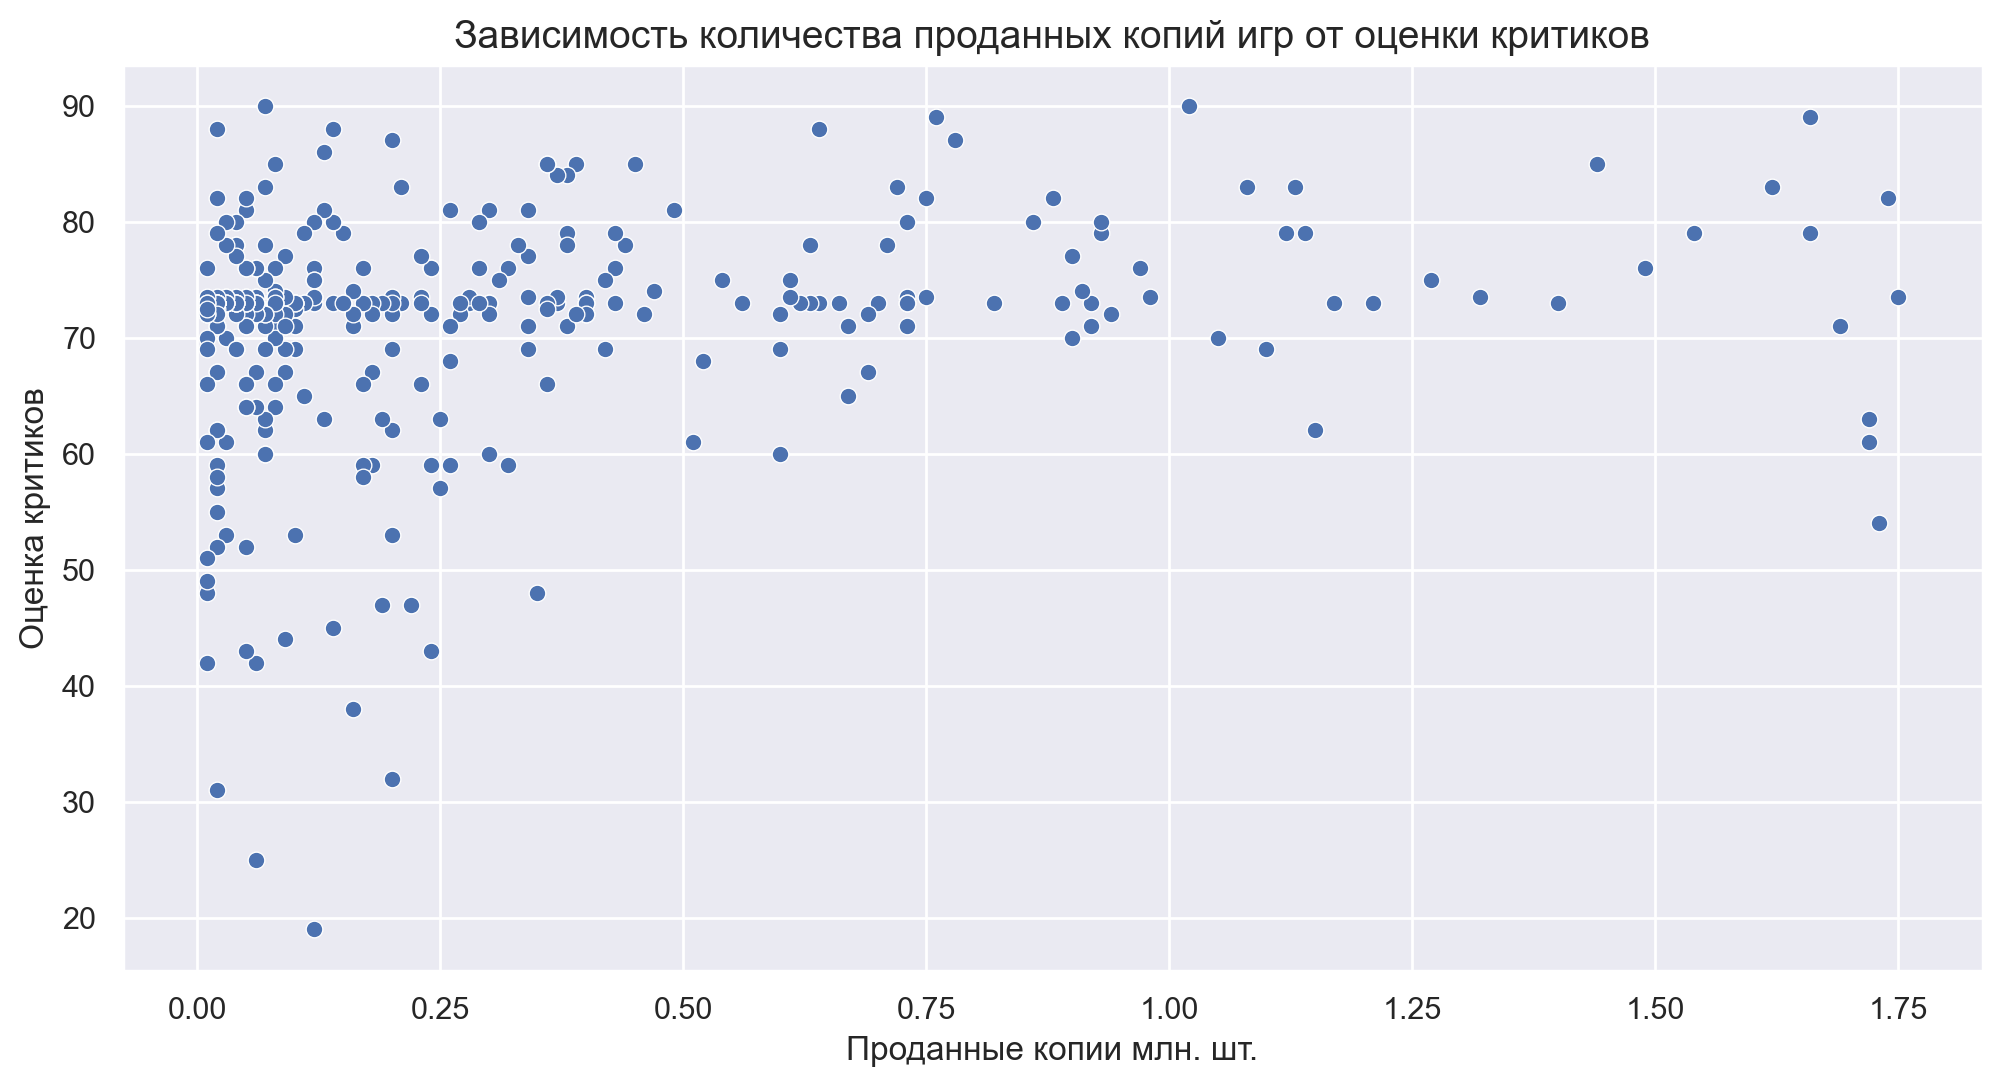

In [58]:
scatterplot_nm({'data': ps, 
                'x': 'all_sales', 
                'y': 'critic_score', 
                'title': 'Зависимость количества проданных копий игр от оценки критиков',
                'xlabel': 'Проданные копии млн. шт.',
                'ylabel': 'Оценка критиков'}
              )

In [59]:
ps.all_sales.corr(ps.critic_score)

0.2086782186971543

*Имеется очень слабая положительная корреляция количества проданных копий от оценки критиков.*

***Посчитаем те же показатели для оставшихся платформ.***

In [60]:
n3ds = profitable_platforms[profitable_platforms['platform'] == '3DS']

In [61]:
xone = profitable_platforms[profitable_platforms['platform'] == 'XOne']

In [62]:
wiiu = profitable_platforms[profitable_platforms['platform'] == 'WiiU']

In [63]:
pc = profitable_platforms[profitable_platforms['platform'] == 'PC']

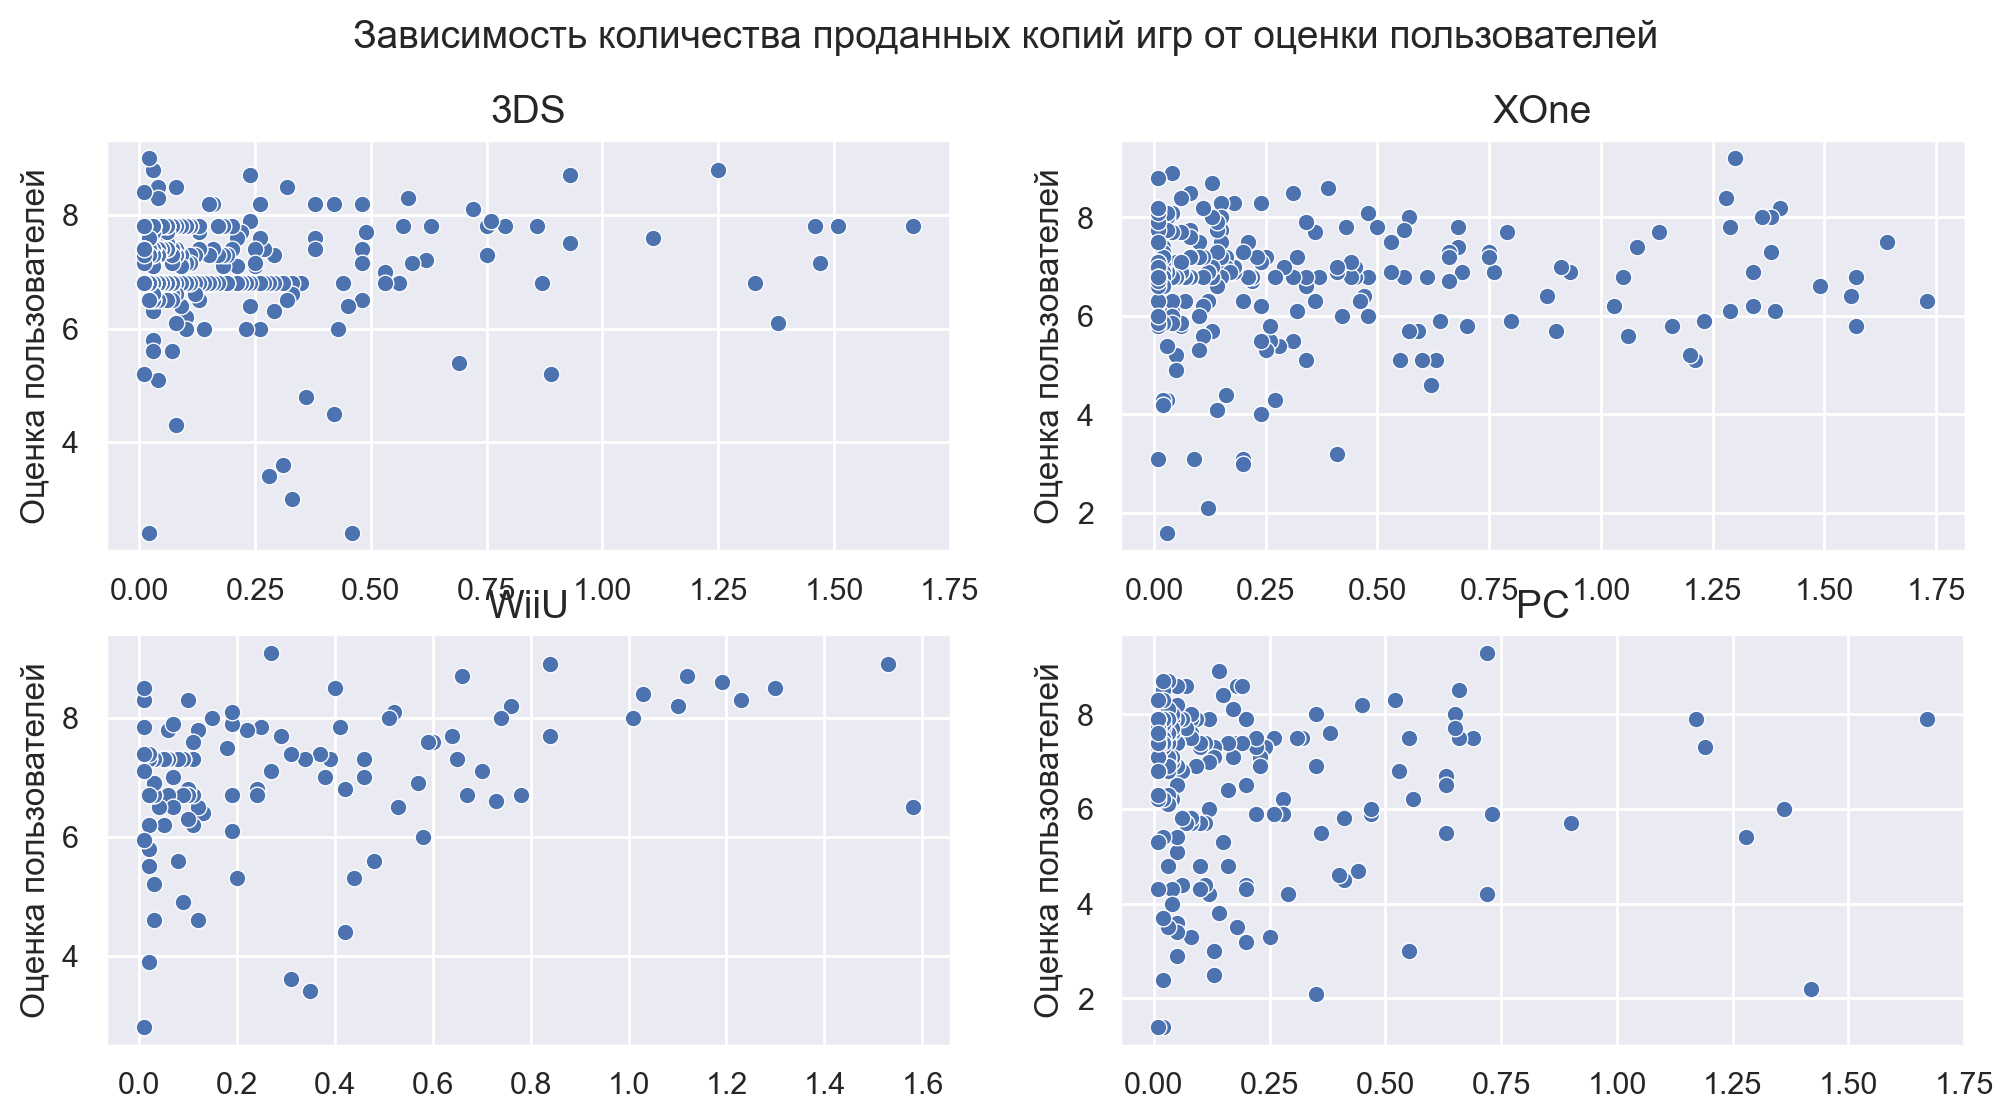

In [64]:
scatterplot_nm(n=2, m=2, suptitle='Зависимость количества проданных копий игр от оценки пользователей', param=[
            {'data': n3ds, 'x': 'all_sales', 'y': 'user_score', 'title': '3DS', 'ylabel': 'Оценка пользователей'},
            {'data': xone, 'x': 'all_sales', 'y': 'user_score', 'title': 'XOne', 'ylabel': 'Оценка пользователей'},
            {'data': wiiu, 'x': 'all_sales', 'y': 'user_score', 'title': 'WiiU', 'ylabel': 'Оценка пользователей'},
            {'data': pc, 'x': 'all_sales', 'y': 'user_score', 'title': 'PC', 'ylabel': 'Оценка пользователей'}
                                                                                                   ]
              )

In [65]:
profitable_platforms.groupby('platform')[['user_score', 'all_sales']].corr()

user_score  all_sales
platform                                  
3DS      user_score        1.00       0.05
         all_sales         0.05       1.00
PC       user_score        1.00      -0.06
         all_sales        -0.06       1.00
PS4      user_score        1.00      -0.01
         all_sales        -0.01       1.00
WiiU     user_score        1.00       0.36
         all_sales         0.36       1.00
XOne     user_score        1.00       0.03
         all_sales         0.03       1.00

*У WiiU зависимость слабая положительная, у остальных платформ она отсутствует.*

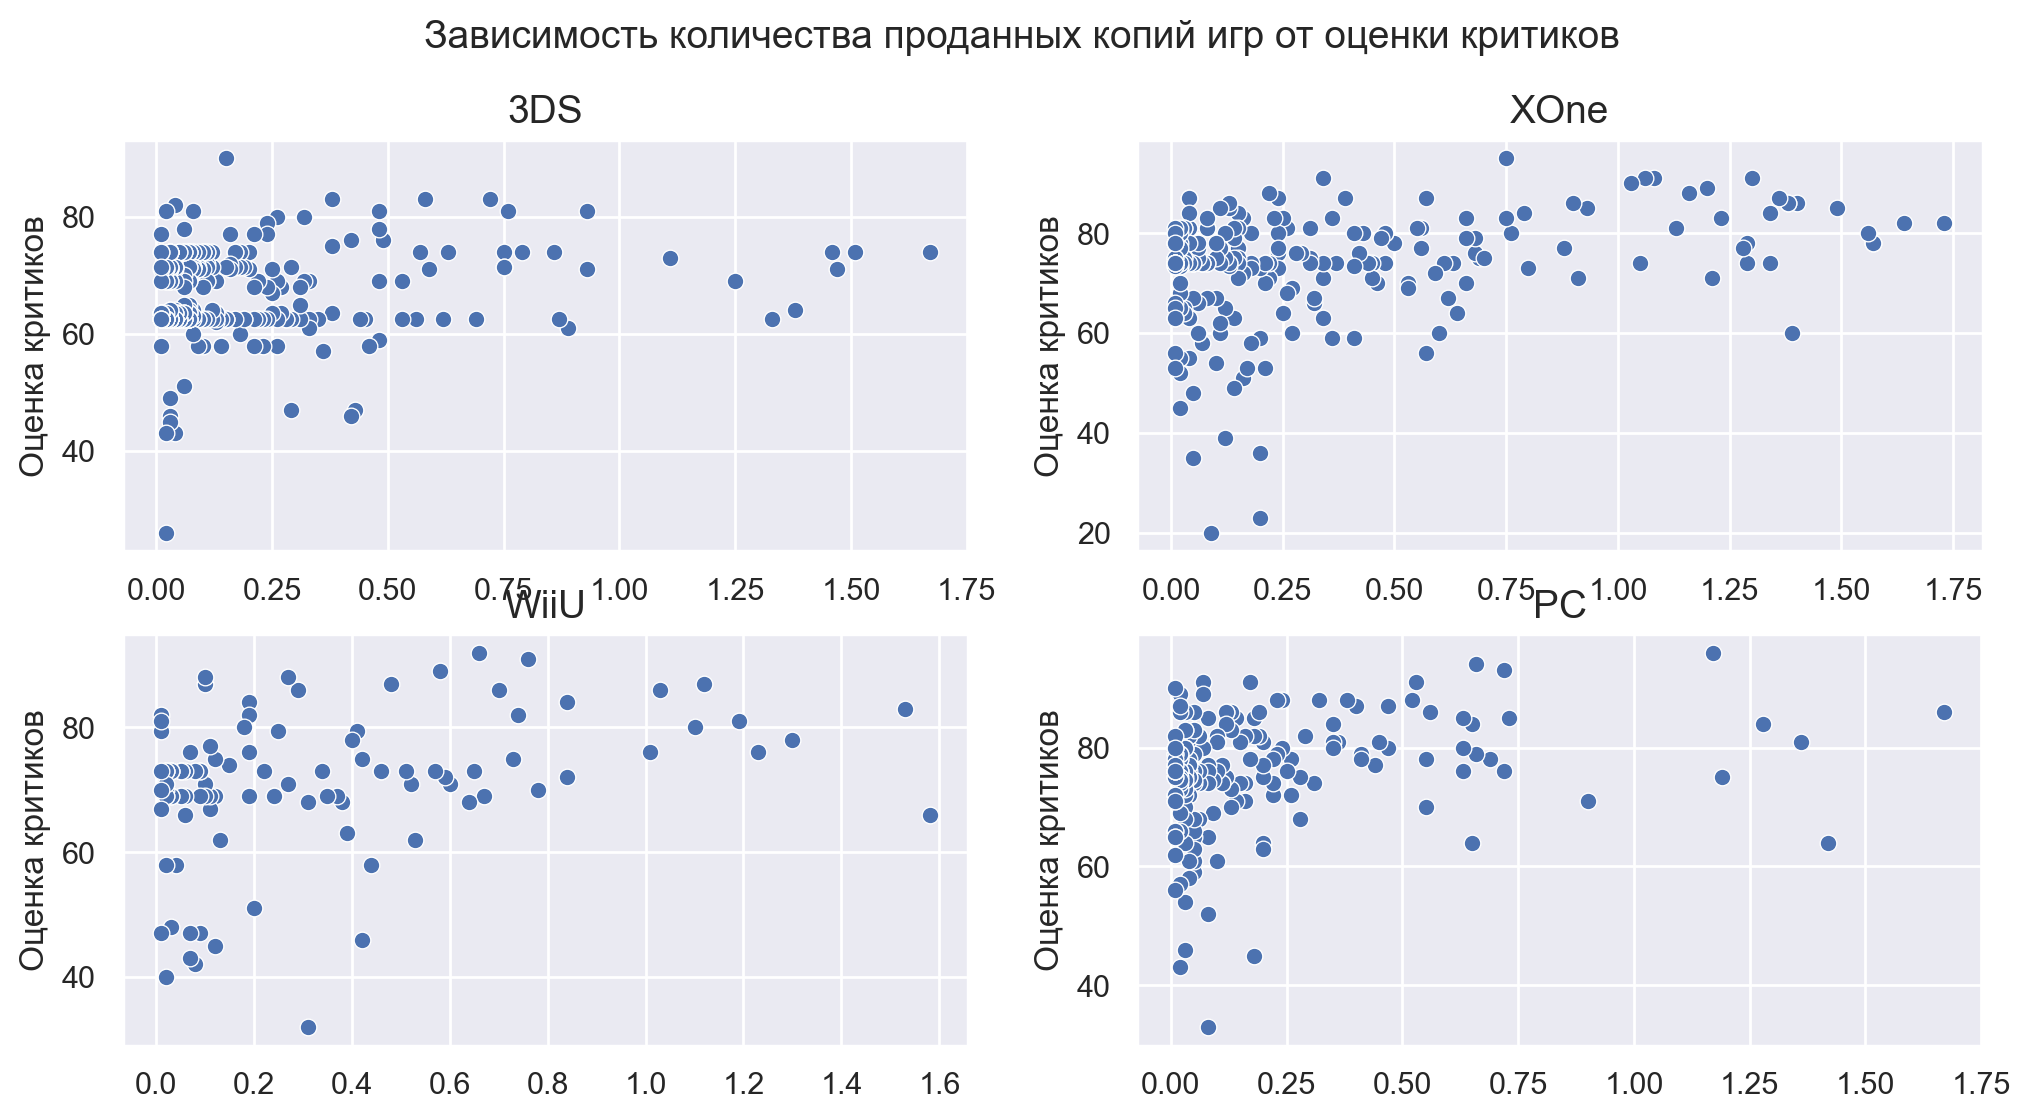

In [66]:
scatterplot_nm(n=2, m=2, suptitle='Зависимость количества проданных копий игр от оценки критиков', param=[
            {'data': n3ds, 'x': 'all_sales', 'y': 'critic_score', 'title': '3DS', 'ylabel': 'Оценка критиков'},
            {'data': xone, 'x': 'all_sales', 'y': 'critic_score', 'title': 'XOne', 'ylabel': 'Оценка критиков'},
            {'data': wiiu, 'x': 'all_sales', 'y': 'critic_score', 'title': 'WiiU', 'ylabel': 'Оценка критиков'},
            {'data': pc, 'x': 'all_sales', 'y': 'critic_score', 'title': 'PC', 'ylabel': 'Оценка критиков'}
                                                                                                ]
              )

In [67]:
profitable_platforms.groupby('platform')[['critic_score', 'all_sales']].corr()

critic_score  all_sales
platform                                      
3DS      critic_score          1.00       0.17
         all_sales             0.17       1.00
PC       critic_score          1.00       0.25
         all_sales             0.25       1.00
PS4      critic_score          1.00       0.21
         all_sales             0.21       1.00
WiiU     critic_score          1.00       0.32
         all_sales             0.32       1.00
XOne     critic_score          1.00       0.33
         all_sales             0.33       1.00

*3DS и PC имеют очень слабую положительную зависимость количества проданных копий от оценки критиков, WiiU, XOne имеют слабую зависимость.*

### Общее распределение игр по жанрам

***Посмотрим на распределение в самой популярной платформе PS4.***

In [68]:
ps_genre = ps.pivot_table(index='genre', values='all_sales', aggfunc=['mean', 'median'])

In [69]:
ps_genre.columns = ['mean', 'median']

In [70]:
ps_genre = ps_genre.sort_values(by='mean')

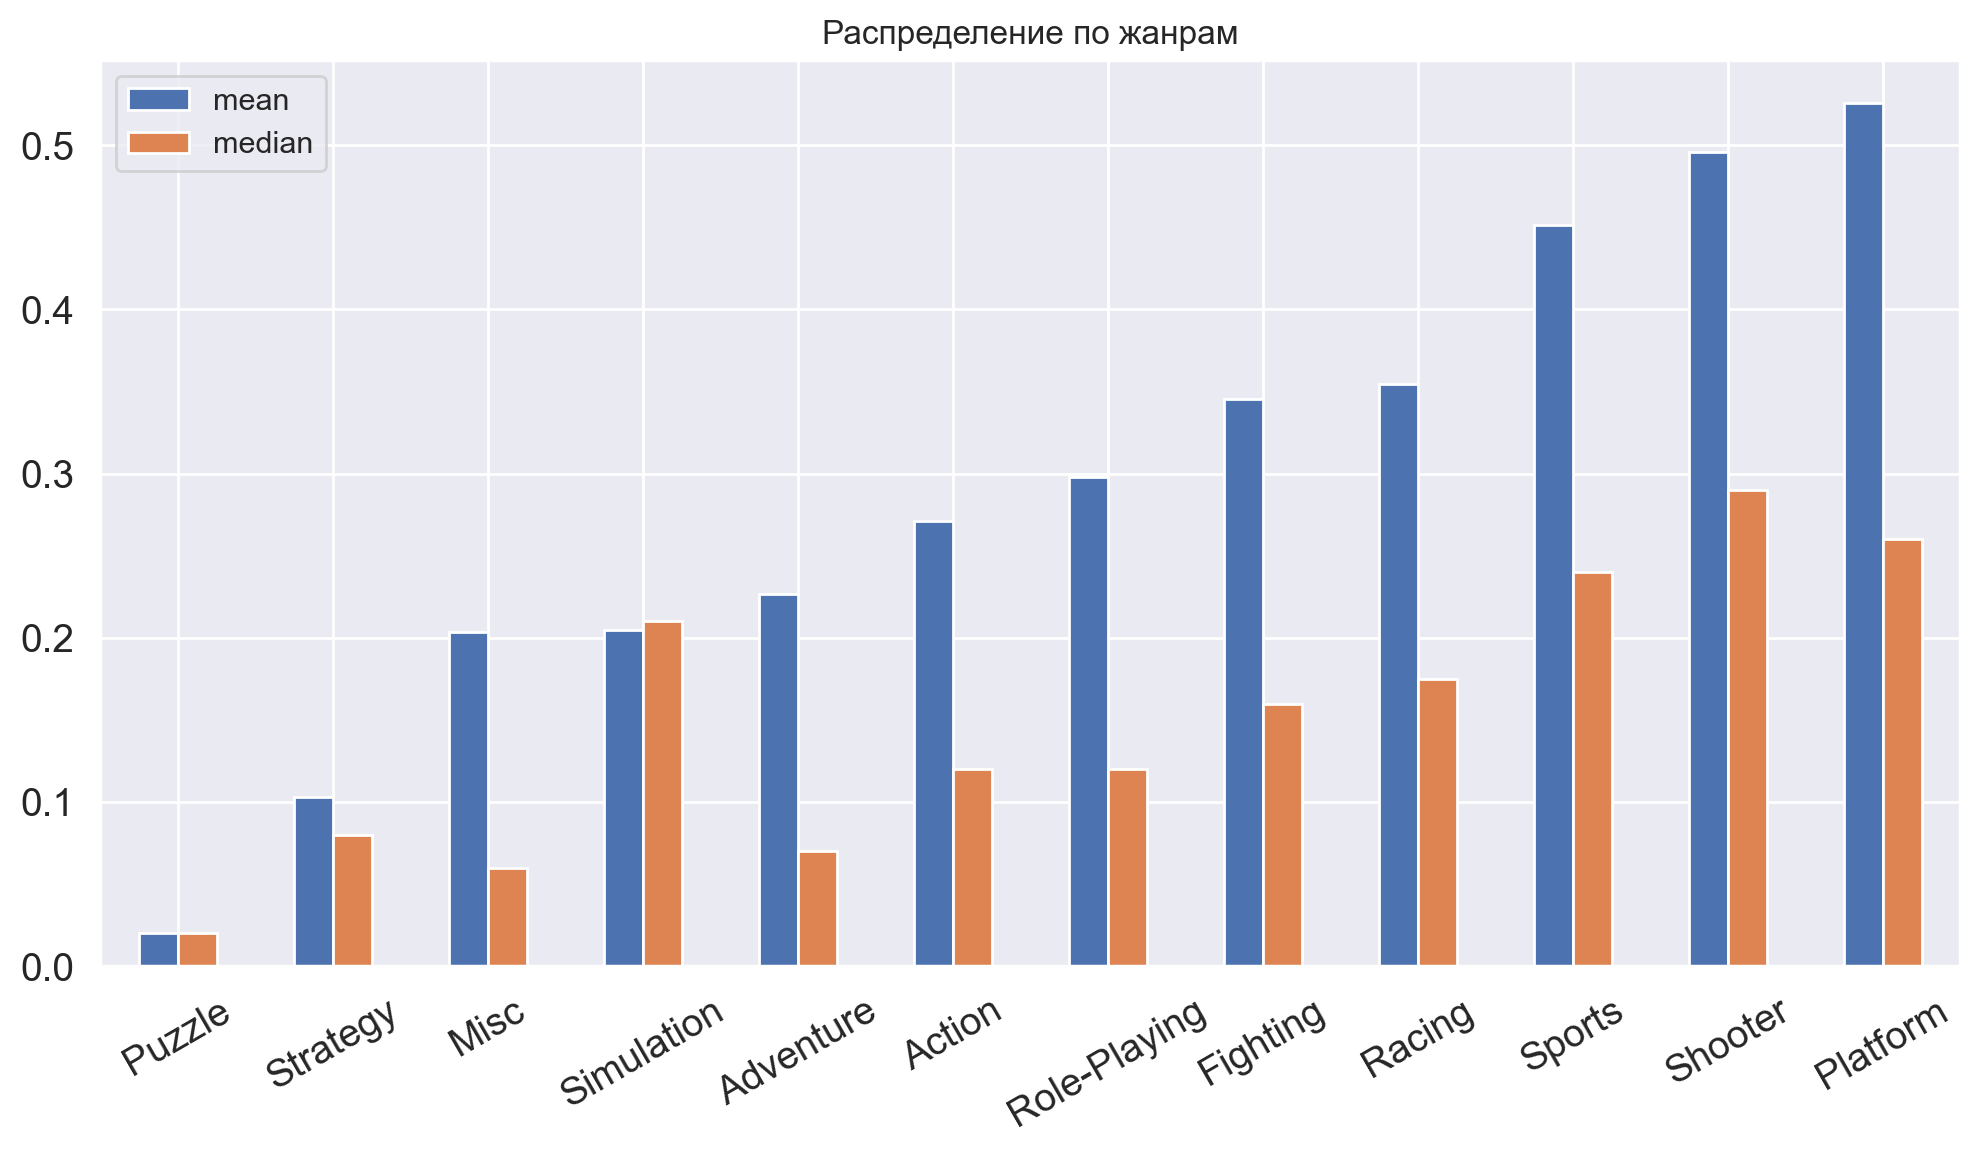

In [71]:
ps_genre.plot(kind='bar', 
              fontsize=14, 
              title='Распределение по жанрам',
              xlabel='', 
              ylabel=''
             )
plt.xticks(rotation=30);

*Больше всего продаж в жанрах Platform, Shooter и Sports, меньше всего игр с жанром Puzzle. У симуляторов среднее и медиана продаж практически одинаковые.*

### Вывод

**В ходе исследовательского анализа было выяснено:**

- Наблюдается подъем выпуска игр с 1992 года, пик достигается в 2009 году, после идет спад и некая стабилизация с 2013 года;
- Данный период стабильности и будет выбран для прогнозирования, как актуальный;
- За актальный период росли только две платформы PS4 и XboxOne;
- С 2015 динамика идет на понижение у всех остальных платформ;
- Характерный средний срок жизни платформы 9.5 лет;
- Самыми прибыльными платформами оказались PS4, PS3, XOne, 3DS, X360; 
- Продажи у PC, хотя это самая старая платформа в этом наборе данных, не очень большие, скорее всего роль сыграло легкодоступность пиратских копий для нее;
- В качестве потенциально прибыльных платформ выбраны PS4, XOne, 3DS, WiiU, PC, они являются самыми актуальными на 2016 год, у остальных платформ заканчивается срок поддержки;
- На любой из выбранных консолей продается больше игр чем на стационарный компьютер;
- Корреляция количества проданных копий от оценки пользователей отсутствует у PS4;
- Имеется очень слабая положительная корреляция количества проданных копий от оценки критиков у PS4;
- У WiiU зависимость слабая положительная от оценки пользователей, у остальных платформ она отсутствует;
- 3DS и PC имеют очень слабую положительную зависимость количества проданных копий от оценки критиков, WiiU, XOne имеют слабую зависимость;
- Больше всего продаж в жанрах Platform, Shooter и Sports, меньше всего игр с жанром Puzzle.

## Составление портрета пользователя каждого региона

### Портрет пользователя NA

#### Топ-5 популярных платформ в NA

In [72]:
na_portret = actual_df.query('na_sales > 0')

In [73]:
top_platform_na = (na_portret
                     .groupby('platform')['na_sales']
                     .sum()
                     .to_frame()
                     .sort_values(by='na_sales', ascending=False)
                     .reset_index()
                     .head(5)  
                  )

In [74]:
top_platform_na

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


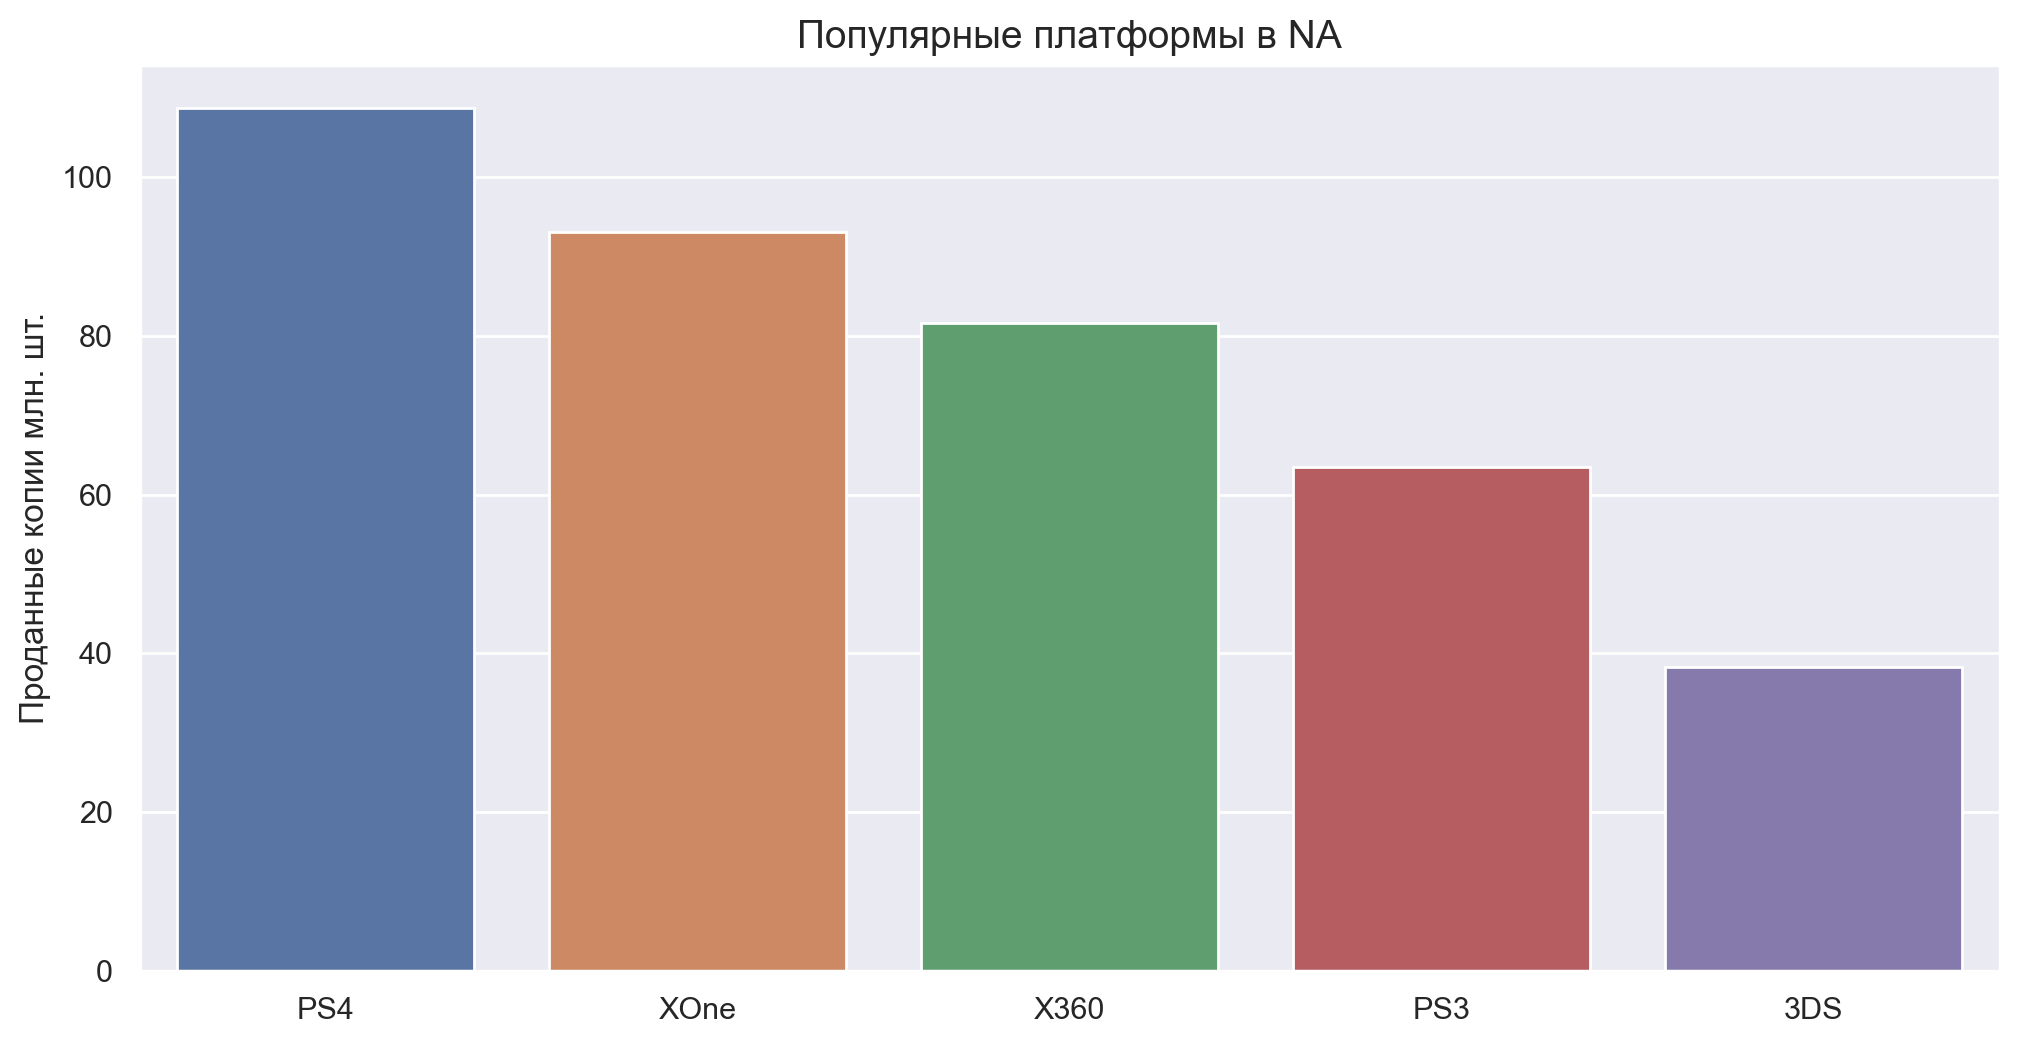

In [75]:
barchart(data=top_platform_na, 
         x='platform', 
         y='na_sales', 
         title='Популярные платформы в NA', 
         ylabel='Проданные копии млн. шт.'
        )

*Самые популярные платформы в NA это 'PS4', 'XOne', 'X360', 'PS3', '3DS'.*

In [76]:
def pie_plot(data, y, labels=None, autopct=None, startangle=None, title='', ylabel=''):
    fig, ax = plt.subplots(figsize=(4, 4))
    data.plot(kind='pie', 
              y=y, 
              labels=labels, 
              autopct=autopct, 
              startangle=startangle, 
              title=title, 
              ylabel=ylabel, 
              legend=False,
              ax=ax
             );

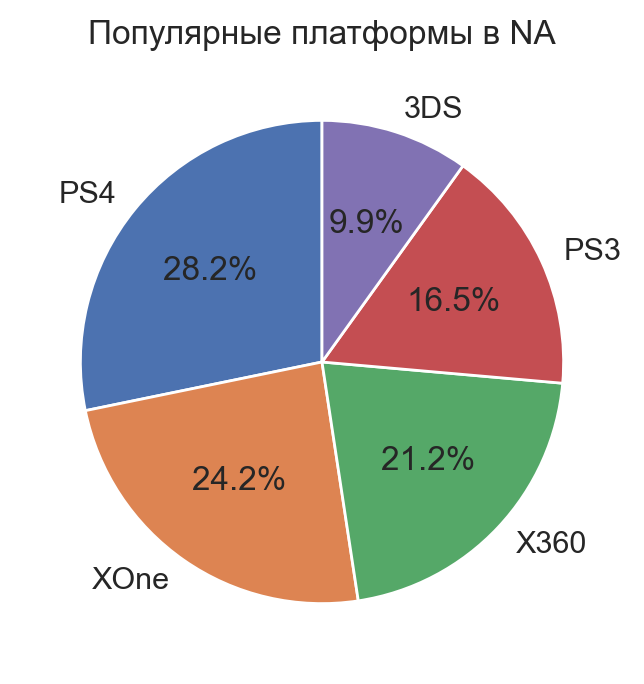

In [77]:
pie_plot(data=top_platform_na, 
         y='na_sales', 
         labels=top_platform_na.platform, 
         autopct='%1.1f%%',
         startangle=90,
         ylabel='',
         title='Популярные платформы в NA'
        )

*Большую долю занимают самые новые консоли 'PS4', 'XOne', не отстает и консоль прошлого поколения 'X360'.*

#### Самые популярные жанры в NA

In [78]:
top_genres_na = na_portret.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()

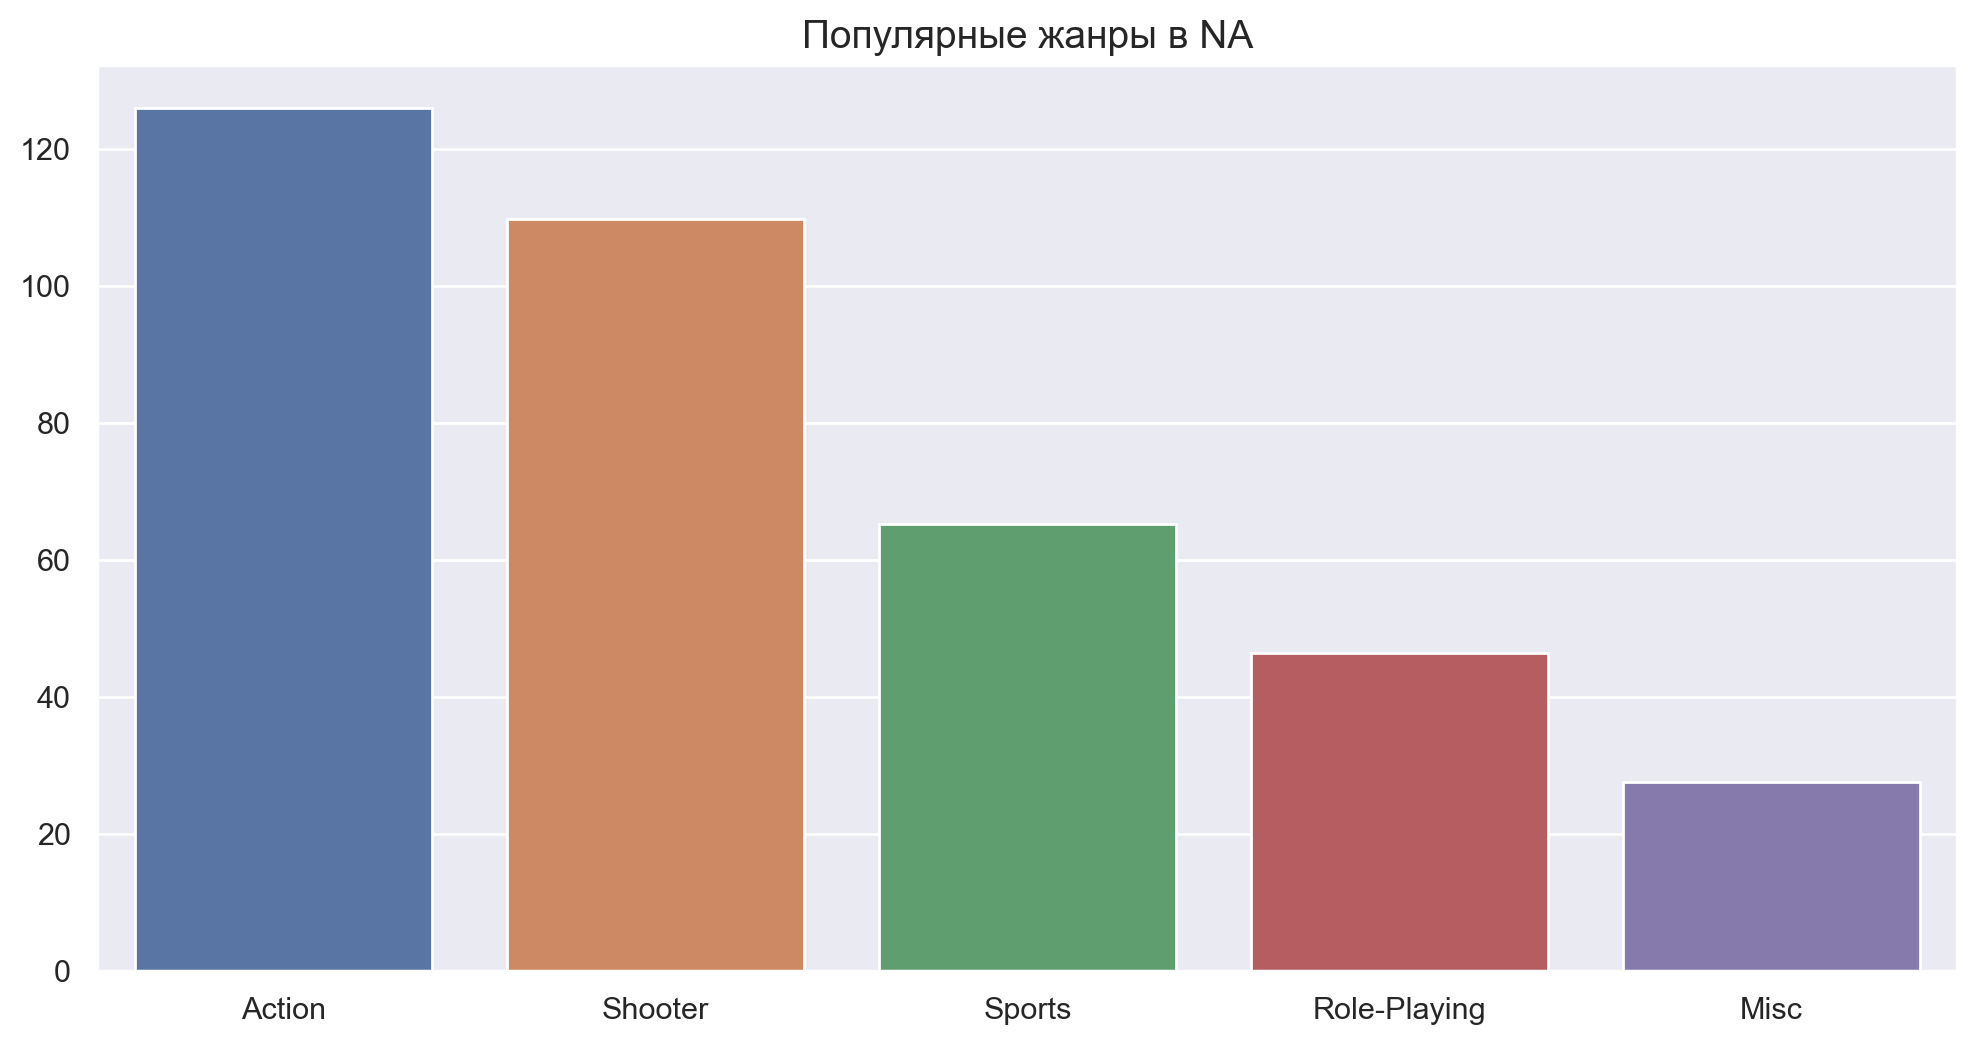

In [79]:
barchart(data=top_genres_na, 
         x=top_genres_na.genre.to_list(), 
         y='na_sales', 
         title='Популярные жанры в NA', 
        )

*Самые популярные жанры в NA это action, shooter, sports, rpg, misc, это объясняется тем что в данные жанры удобно играть на консоле через геймпад, популярные платформы это подтверждают.*

#### Влияние рейтинга ESRB на продажи в регионе

In [80]:
esrb_na_sales = na_portret.groupby('rating')['na_sales'].sum().reset_index()

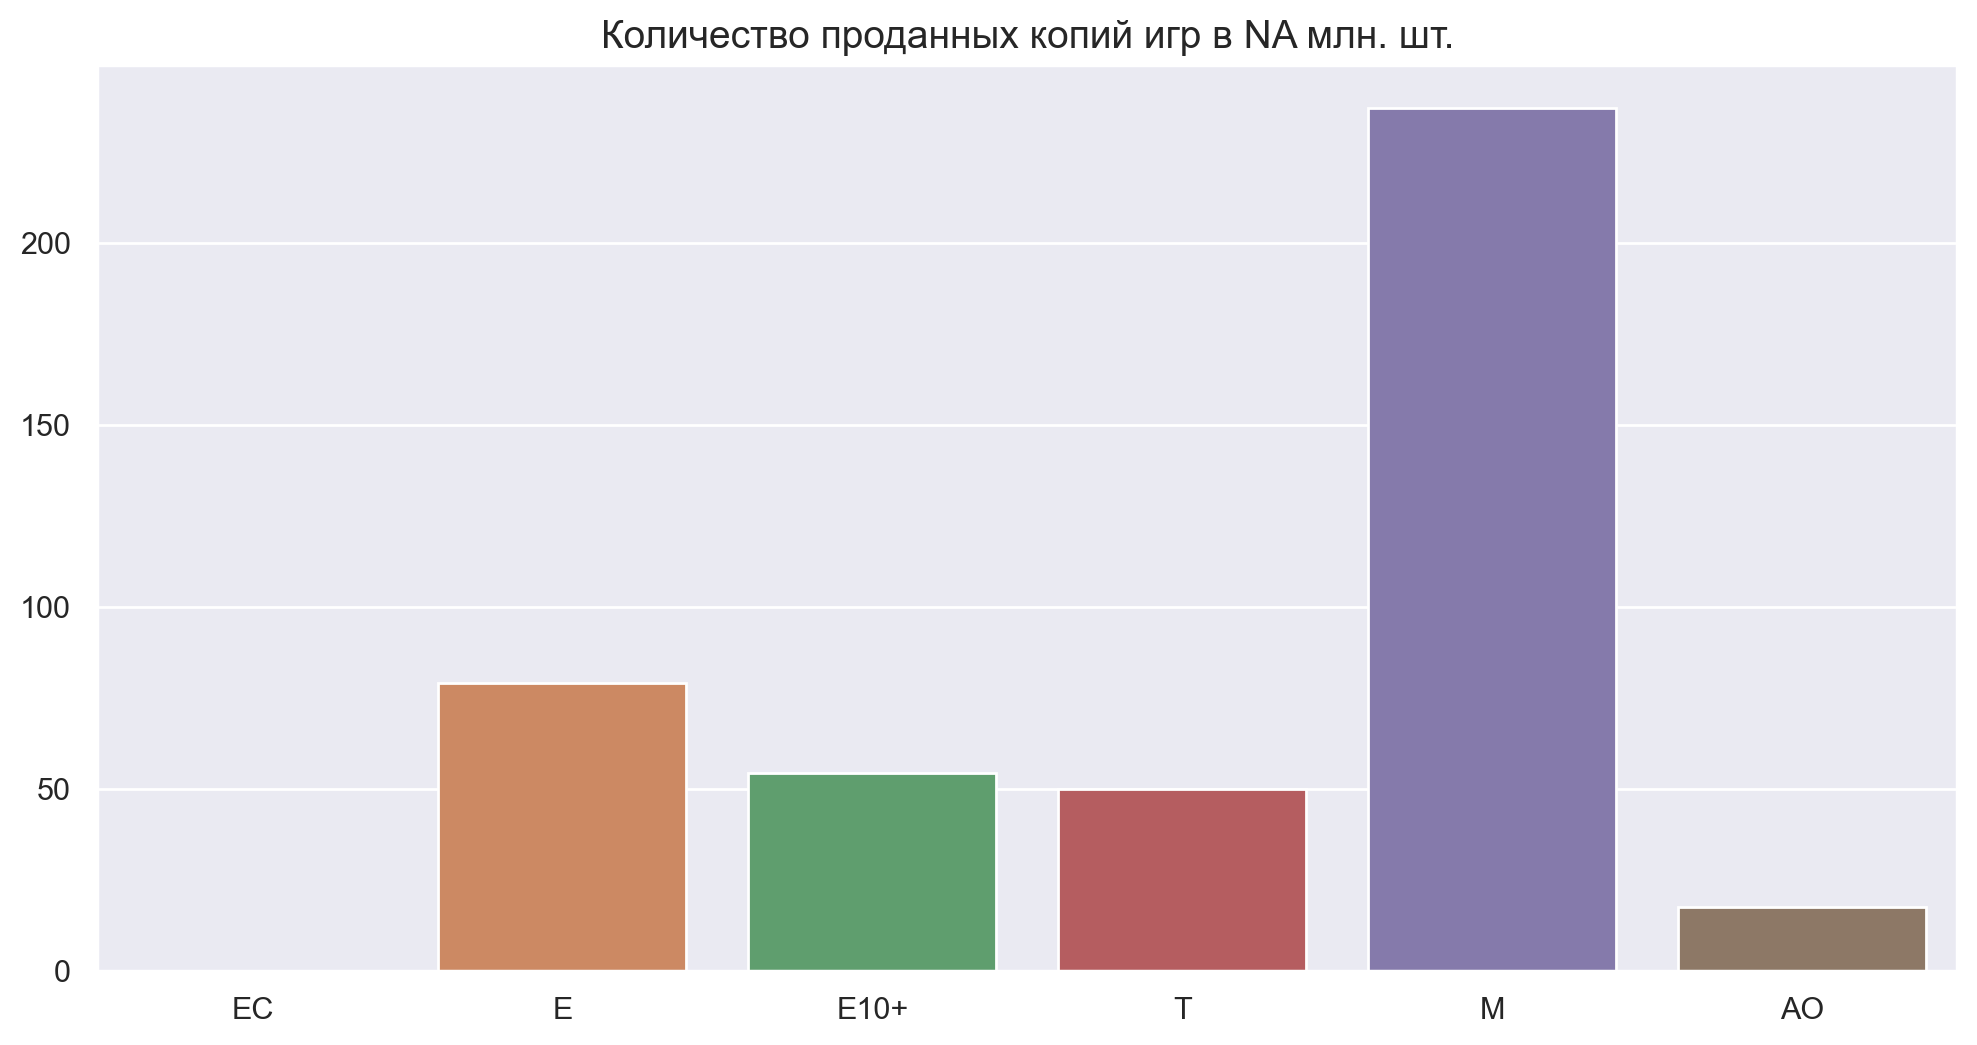

In [81]:
barchart(data=esrb_na_sales.reset_index(), 
         x='rating', 
         y='na_sales', 
         title='Количество проданных копий игр в NA млн. шт.', 
        )

*Рейтинг ESRB скорее не влияет чем влияет, больше всего продаж игр с рейтингом M - Mature, но так как игры в жанре action и shooter чаще всего получают именно его, то в этом нет ничего удивительного.*

### Портрет пользователя EU

#### Топ-5 популярных платформ в EU

In [82]:
eu_portret = actual_df.query('eu_sales > 0')

In [83]:
top_platform_eu = (eu_portret
                     .groupby('platform')['eu_sales']
                     .sum()
                     .to_frame()
                     .sort_values(by='eu_sales', ascending=False)
                     .reset_index()
                     .head(5)  
                  )

In [84]:
top_platform_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


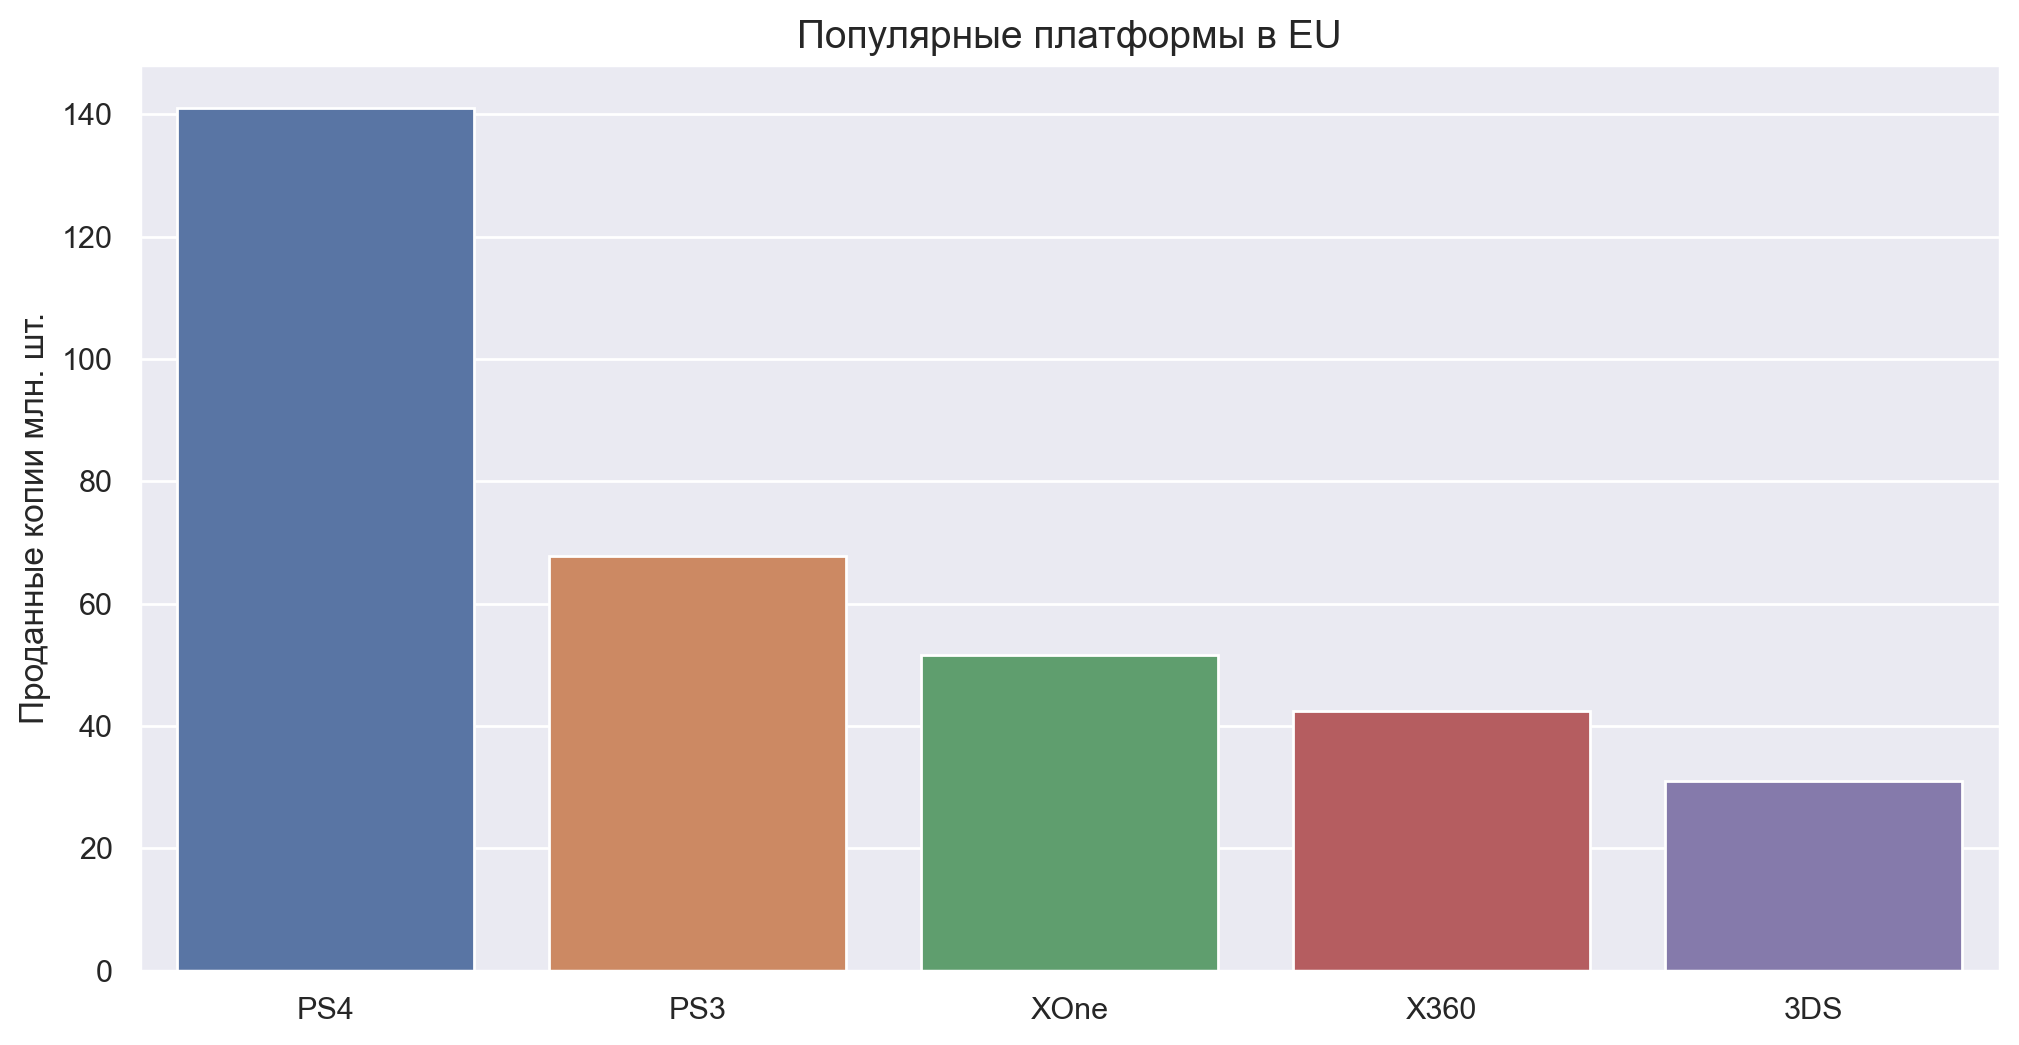

In [85]:
barchart(data=top_platform_eu, 
         x='platform', 
         y='eu_sales', 
         title='Популярные платформы в EU', 
         ylabel='Проданные копии млн. шт.'
        )

*Самые популярные платформы в EU это 'PS4', 'PS3', 'XOne', 'X360', '3DS'.*

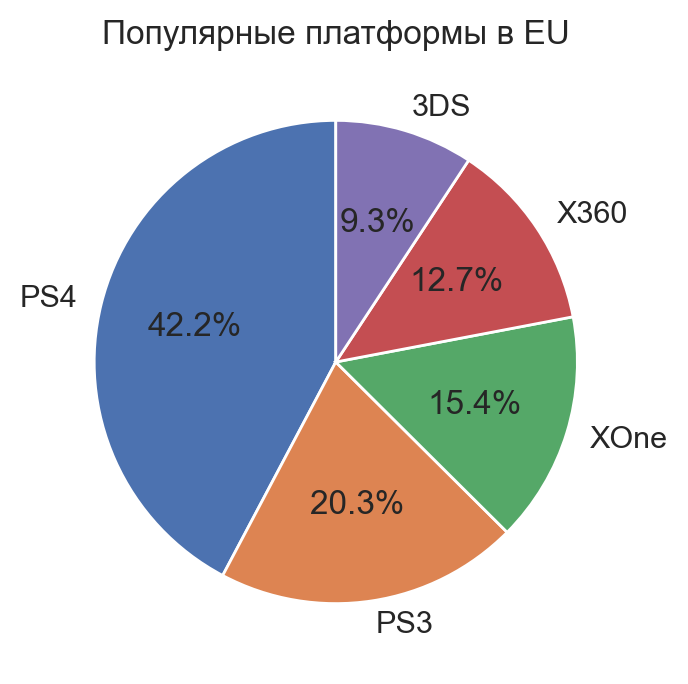

In [86]:
pie_plot(data=top_platform_eu, 
         y='eu_sales', 
         labels=top_platform_eu.platform, 
         autopct='%1.1f%%',
         startangle=90,
         ylabel='',
         title='Популярные платформы в EU'
        )

*PS4 занимет целых 42.2%, за ним идет PS3 и уже потом все остальные.*

#### Самые популярные жанры в EU

In [87]:
top_genres_eu = eu_portret.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()

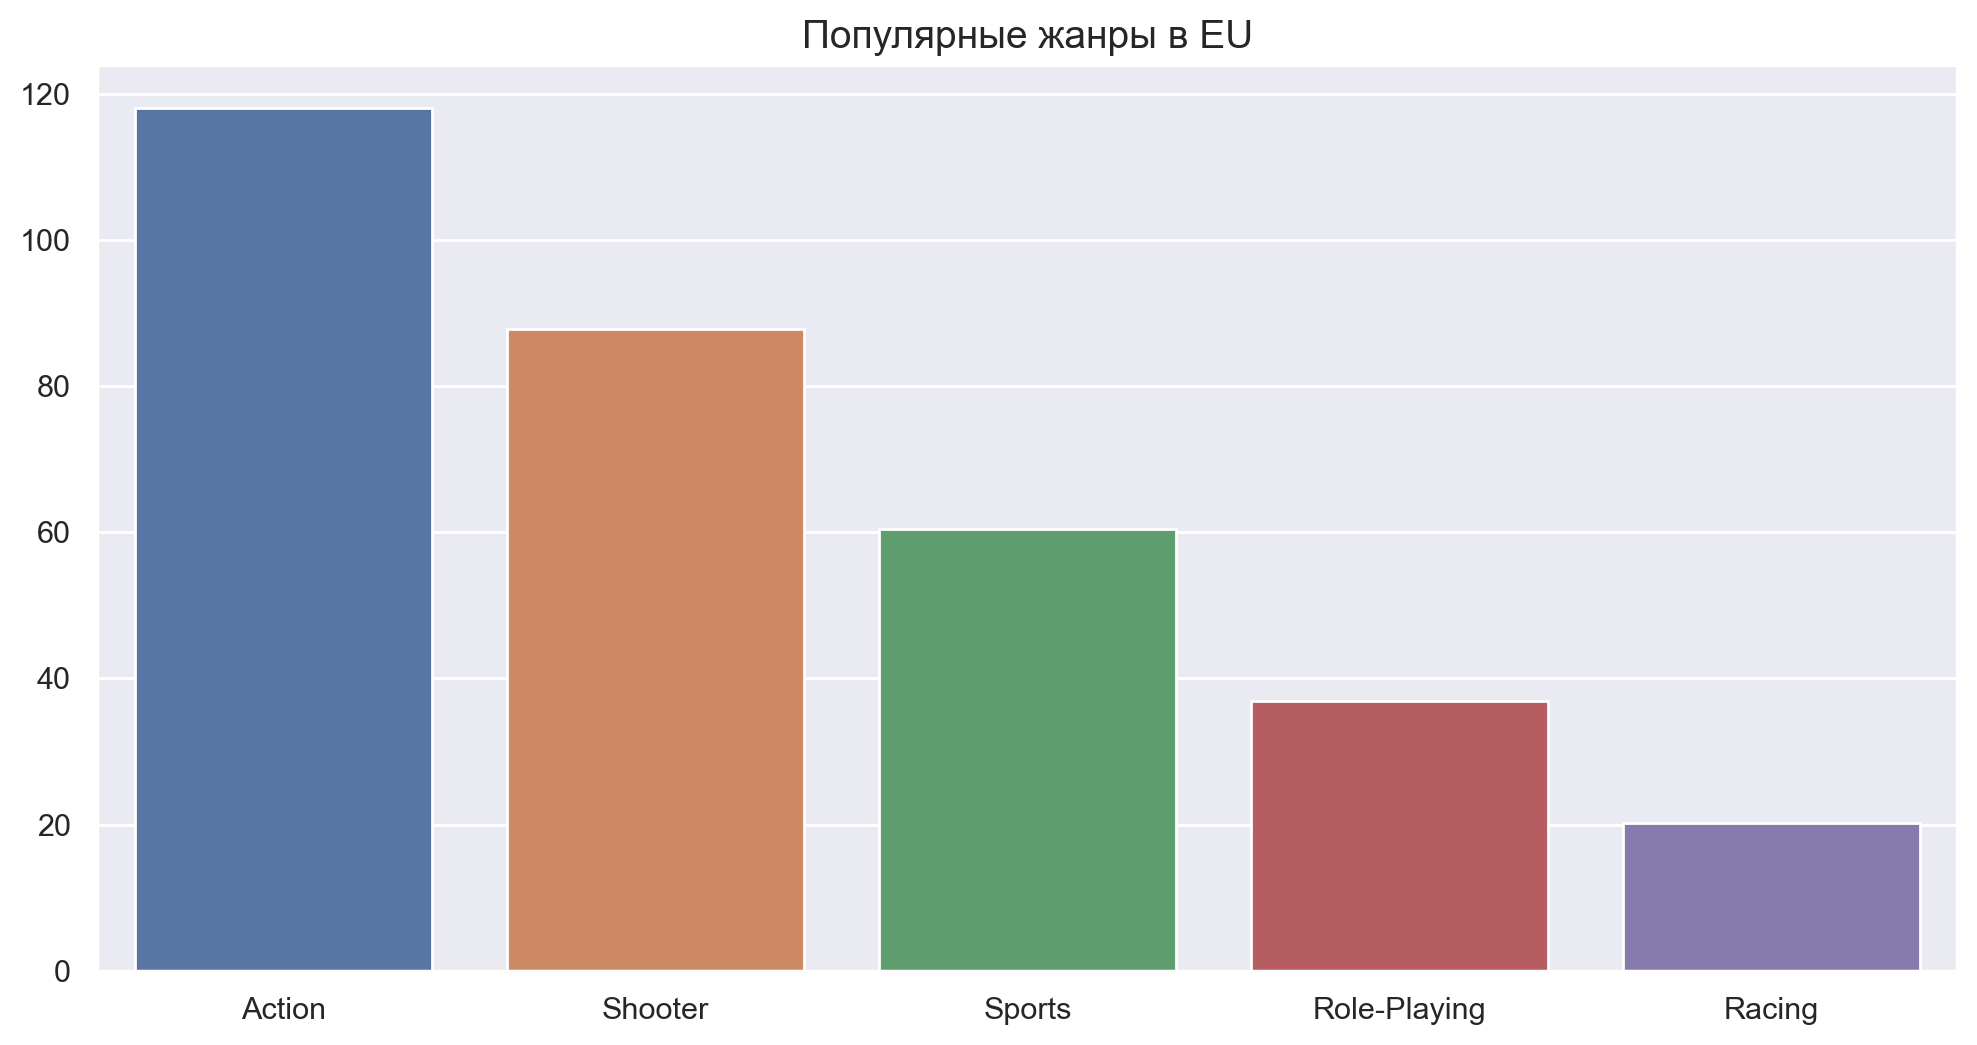

In [88]:
barchart(data=top_genres_eu, 
         x=top_genres_eu.genre.to_list(), 
         y='eu_sales', 
         title='Популярные жанры в EU', 
        )

*Самые популярные жанры в EU это action, shooter, sports, rpg, racing, это объясняется так же как и в NA, тем что в данные жанры удобно играть на консоле через геймпад, с большим отрывом популярен жанр action*

#### Влияние рейтинга ESRB на продажи в регионе

In [89]:
esrb_eu_sales = eu_portret.groupby('rating')['eu_sales'].sum()

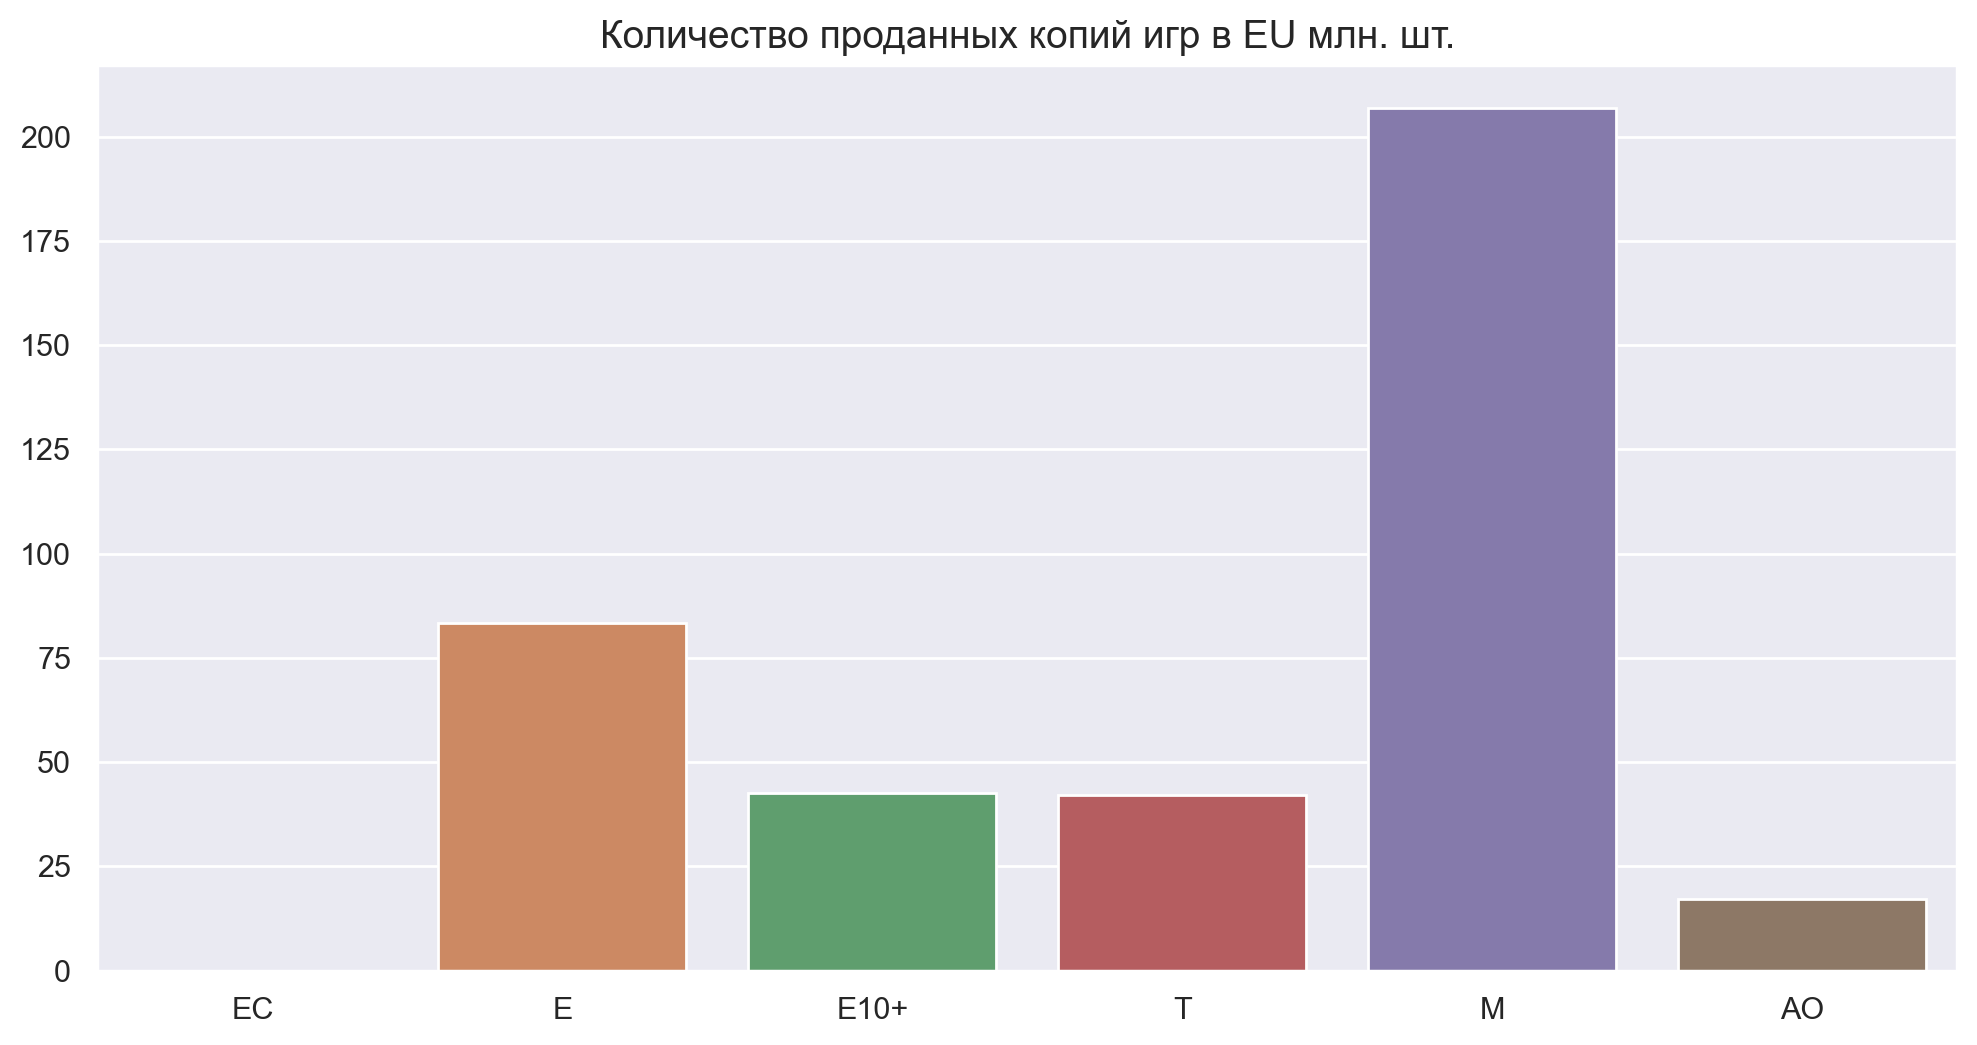

In [90]:
barchart(data=esrb_eu_sales.reset_index(), 
         x='rating', 
         y='eu_sales', 
         title='Количество проданных копий игр в EU млн. шт.', 
        )

*С большим отрывом по продажам лидируют игры с рейтингом M - Mature, жанры action и shooter тут так же на это повлияли.*

### Портрет пользователя JP

#### Топ-5 популярных платформ в JP

In [91]:
jp_portret = actual_df.query('jp_sales > 0')

In [92]:
top_platform_jp = (jp_portret
                     .groupby('platform')['jp_sales']
                     .sum()
                     .to_frame()
                     .sort_values(by='jp_sales', ascending=False)
                     .reset_index()
                     .head(5)  
                  )

In [93]:
top_platform_jp

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.28
3,PS4,15.96
4,WiiU,10.88


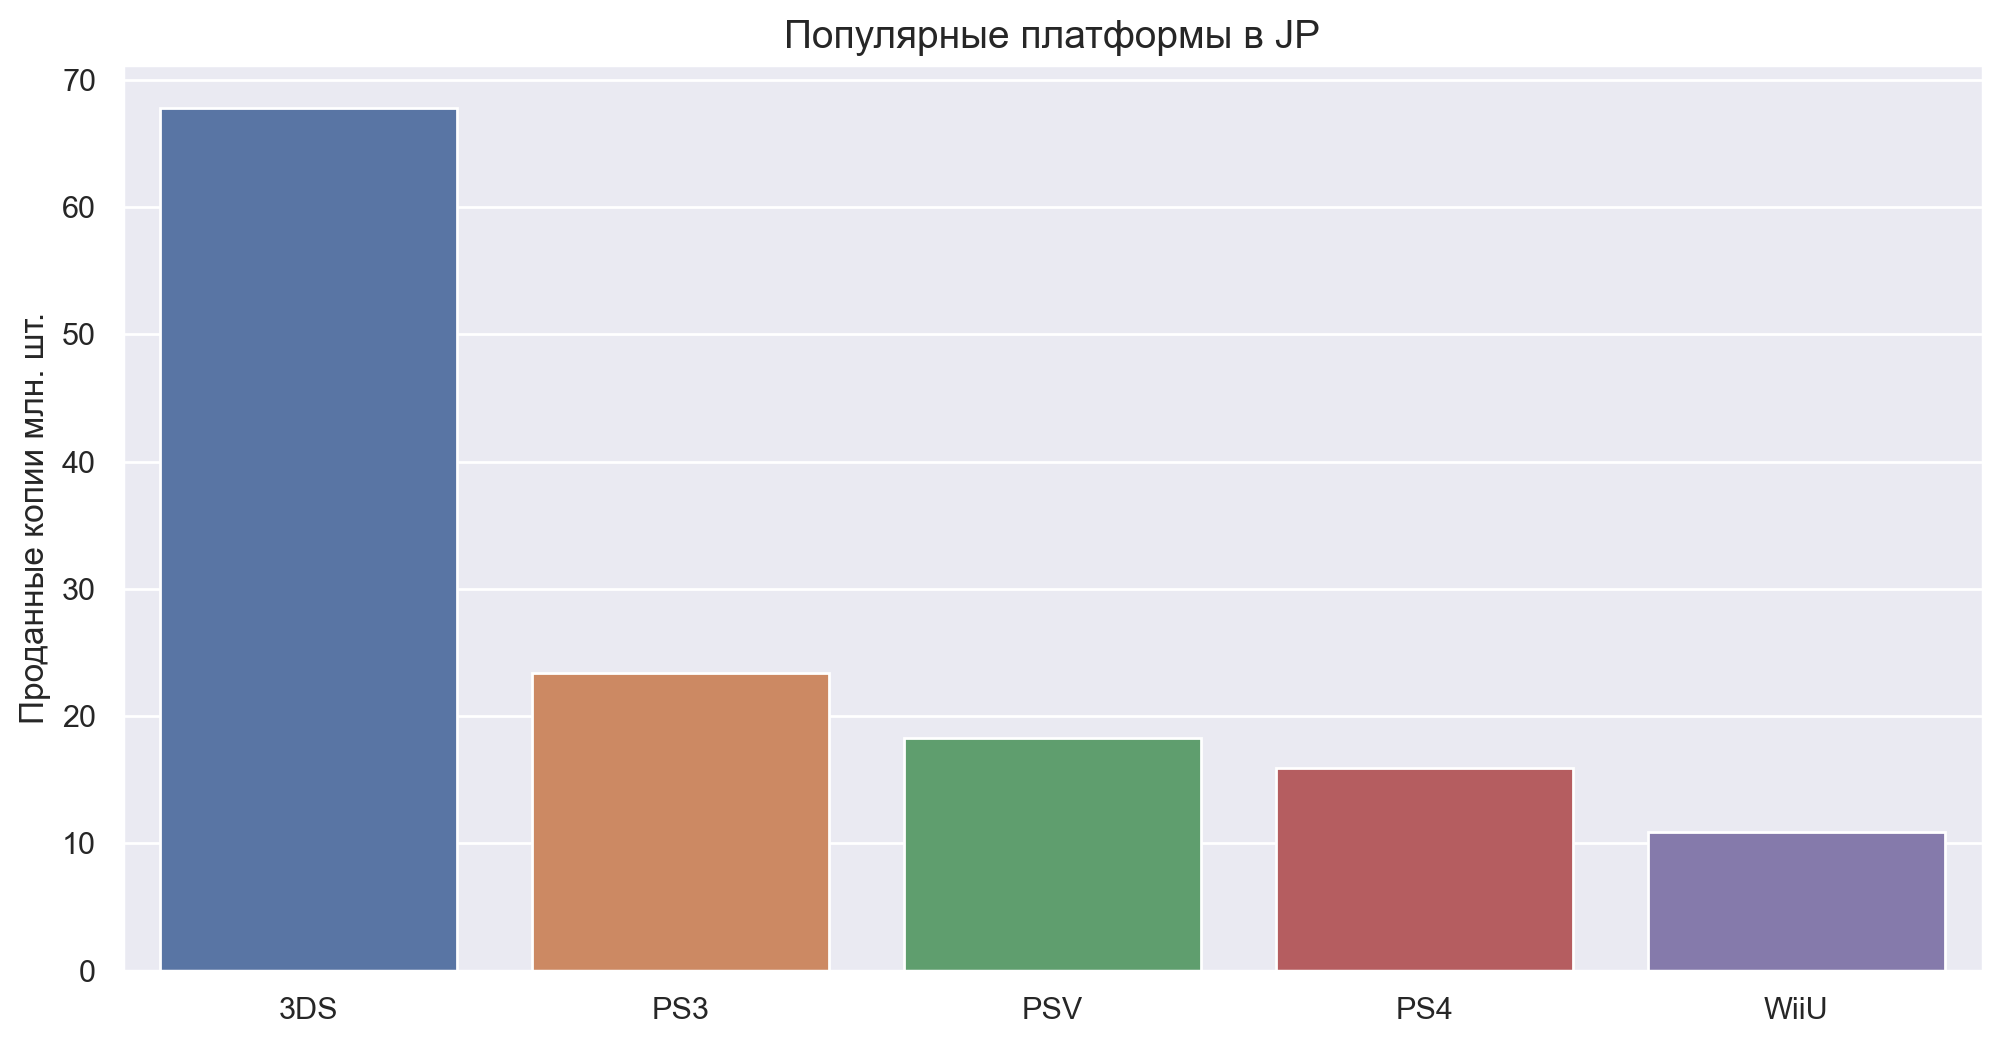

In [94]:
barchart(data=top_platform_jp, 
         x='platform', 
         y='jp_sales', 
         title='Популярные платформы в JP', 
         ylabel='Проданные копии млн. шт.'
        )

*Самые популярные в Японии оказались отечественные платформы 3DS, PS3, PSV, PS4, WiiU.*

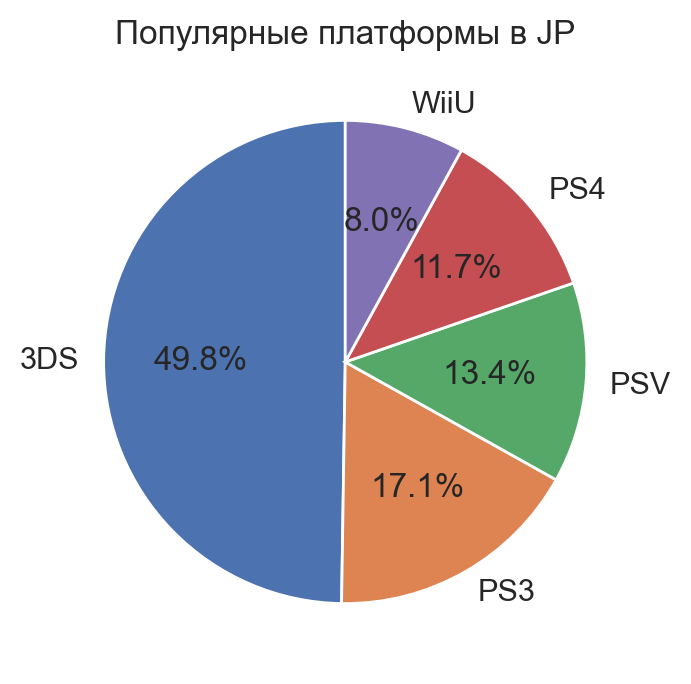

In [95]:
pie_plot(data=top_platform_jp, 
         y='jp_sales', 
         labels=top_platform_jp.platform, 
         autopct='%1.1f%%',
         startangle=90,
         ylabel='',
         title='Популярные платформы в JP'
        )

*Портативная консоль 3DS занимает половину рынка, остальные платформы делять рынок практически в равных долях.*

#### Самые популярные жанры в JP

In [96]:
top_genres_jp = (jp_portret.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index())

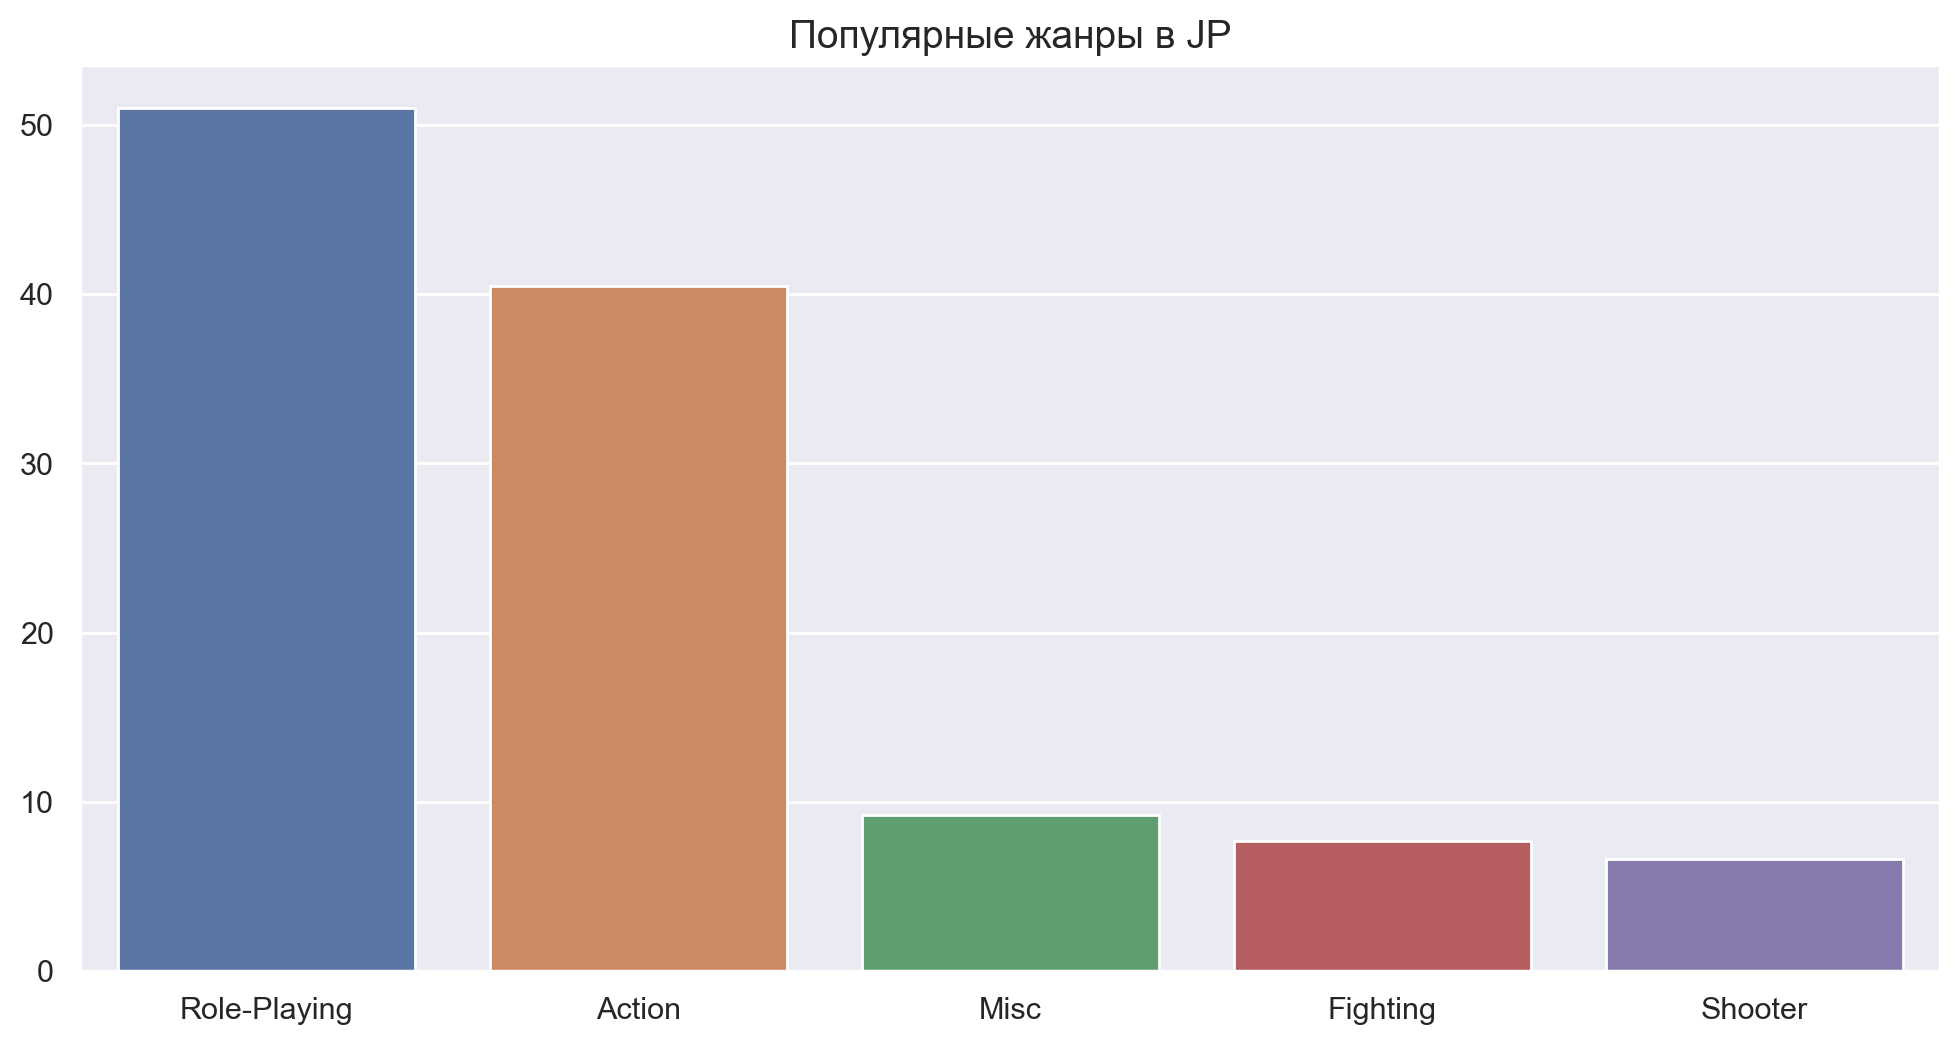

In [97]:
barchart(data=top_genres_jp, 
         x=top_genres_jp.genre.to_list(), 
         y='jp_sales', 
         title='Популярные жанры в JP', 
        )

*Самые популярные жанры в JP это rpg, action, misc, fighting, shooter, во все эти жанры удобно играть на портативных консолях, которые так популярны в Японии.*

#### Влияние рейтинга ESRB на продажи в регионе

In [98]:
esrb_jp_sales = jp_portret.groupby('rating')['jp_sales'].sum()

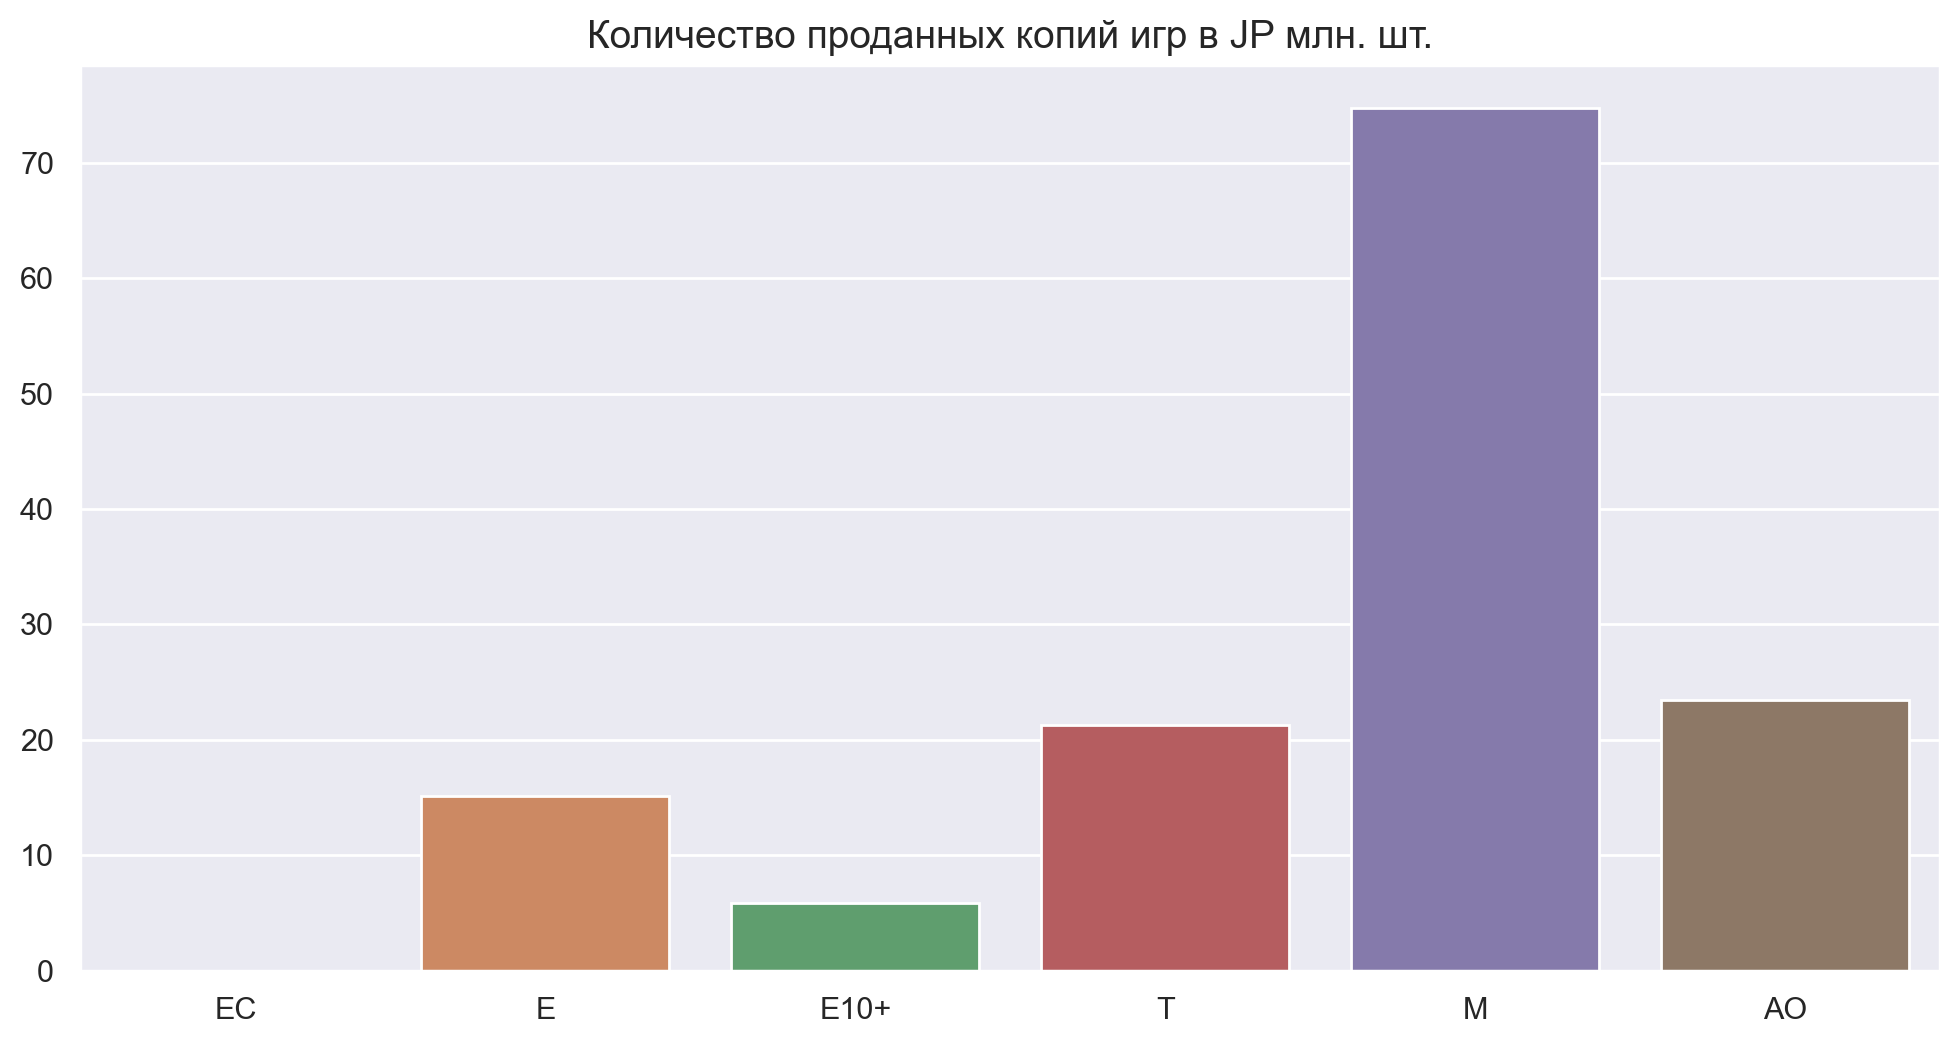

In [99]:
barchart(data=esrb_jp_sales.reset_index(), 
         x='rating', 
         y='jp_sales', 
         title='Количество проданных копий игр в JP млн. шт.', 
        )

*Влияние такое же как и в остальных исследованных регионах.*

### Вывод

**Составление портрета выявило следующее:***

- Самые популярные платформы в Северной Америке это 'PS4', 'XOne', 'X360', 'PS3', '3DS';
- Самую большую долю занимают новейшие консоли 'PS4', 'XOne', не отстает и консоль прошлого поколения 'X360';
- На X360 и XOne в NA приходится больше половины от мировых продаж;
- Самые популярные жанры в NA это action, shooter, sports, rpg, misc, это объясняется тем что в данные жанры удобно играть на консоле через геймпад;
- Самые популярные жанры в Европе такие же как и в Северной Америке, с большим отрывом популярен жанр action;
- С большим отрывом по продажам лидируют игры с рейтингом M - Mature, во всех регионах;
- Самые популярные в Японии оказались отечественные платформы 3DS, PS3, PSV, PS4, WiiU;
- Портативная консоль 3DS занимает половину рынка в Японии, остальные платформы делять рынок практически в равных долях;
- Так как 3DS самая популярная платформа в Японии, на нее приходится половина от мировых продаж игр под нее, следом с еще большим размахом идет psv;
- Самые популярные жанры в Японии это rpg, action, misc, fighting, shooter, во все эти жанры удобно играть на портативных консолях, которые так популярны у них.

## Проверка гипотез

**Проверим гипотезы:**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Сформулируем нулевую гипотезу:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
**Сформулируем алтернативную гипотезу:** средние пользовательские рейтинги платформ Xbox One и PC различаются.

***Чтобы проверить гипотезу проведем t-тест.***

In [100]:
def t_test_ind(array1, array2, equal_var=True, alpha=.05, title_array1='', title_array2='', draw=False):
    """
        array1 - первая выборка
        array2 - вторая выборка
        equal_var - считать ли равными дисперсии выборок
        alpha - уровень статистической значимости
        title_array1 - заголовок для графика первой выборки
        title_array2 - заголовок для графика второй выборки
        draw - отрисовывать ли график
        
    """
    
    
    alpha = alpha 
    
    if draw:
        fig, ax = plt.subplots(2, 2)

        sns.histplot(data=array1, x=array1.values, ax=ax[0][0])
        ax[0][0].set_title(title_array1)
        ax[0][0].set_ylabel('')
        sns.histplot(data=array2, x=array2.values, ax=ax[0][1])
        ax[0][1].set_title(title_array2)
        ax[0][1].set_ylabel('')

        sns.boxplot(data=array1, x=array1.values, ax=ax[1][0])
        sns.boxplot(data=array2, x=array2.values, ax=ax[1][1])
        
        plt.show()
        
    results = st.ttest_ind(array1, array2, equal_var=equal_var)
    print('p-значение:', results.pvalue)
    
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу") 

In [101]:
xbox_one_user_score = profitable_platforms.query('platform == "XOne"').user_score

In [102]:
pc_user_score = profitable_platforms.query('platform == "PC"').user_score

In [103]:
# Дисперсия для пользователей Xbox One
np.var(xbox_one_user_score, ddof=1)

1.4433861236802434

In [104]:
# Дисперсия для пользователей PC
np.var(pc_user_score, ddof=1)

2.7063155649106845

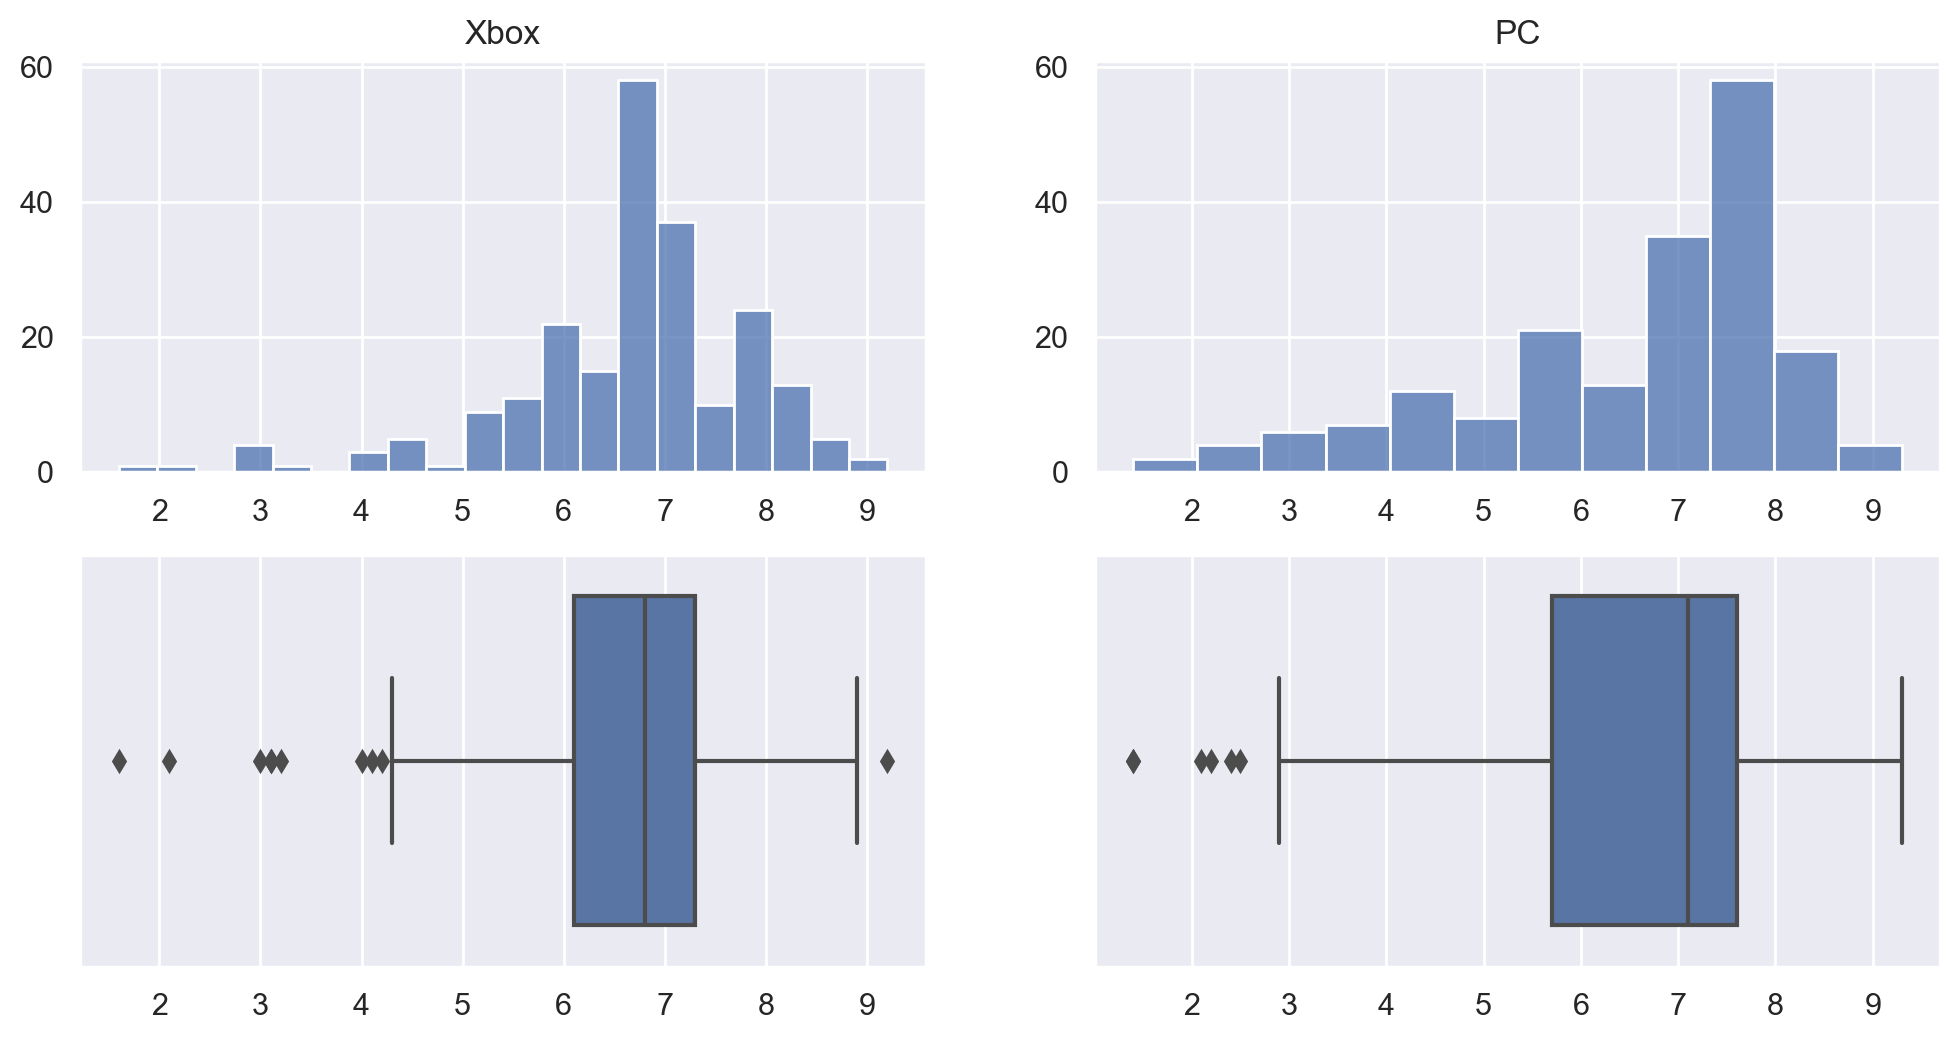

p-значение: 0.26990485918613805
Не получилось отвергнуть нулевую гипотезу


In [105]:
t_test_ind(xbox_one_user_score, pc_user_score, equal_var=False, title_array1='Xbox', title_array2='PC', draw=True)

***Уберем выбросы для более точных расчетов***

In [106]:
xbox_one_user_score = xbox_one_user_score[(xbox_one_user_score > 4.5) & (xbox_one_user_score < 9)]
xbox_one_user_score.shape

(207,)

In [107]:
pc_user_score = pc_user_score[pc_user_score > 3]
pc_user_score.shape

(179,)

In [108]:
t_test_ind(xbox_one_user_score, pc_user_score, equal_var=False)

p-значение: 0.2017862568394143
Не получилось отвергнуть нулевую гипотезу


*Проведенный тест показывает что нельзя отвергать нулевую гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

### Средние пользовательские рейтинги жанров Action и Sports разные

**Сформулируем нулевую гипотезу:** cредние пользовательские рейтинги жанров Action и Sports разные одинаковые.  
**Сформулируем алтернативную гипотезу:** cредние пользовательские рейтинги жанров Action и Sports разные.

***Чтобы проверить гипотезу проведем t-тест.***

In [109]:
action_user_score = profitable_platforms.query('genre == "Action"').user_score

In [110]:
sports_user_score = profitable_platforms.query('genre == "Sports"').user_score

***Посмотрим на распределение***

In [111]:
# Дисперсия для жанра Action
np.var(action_user_score, ddof=1)

1.0040392685851323

In [112]:
# Дисперсия для жанра Sports
np.var(sports_user_score, ddof=1)

2.365446271929823

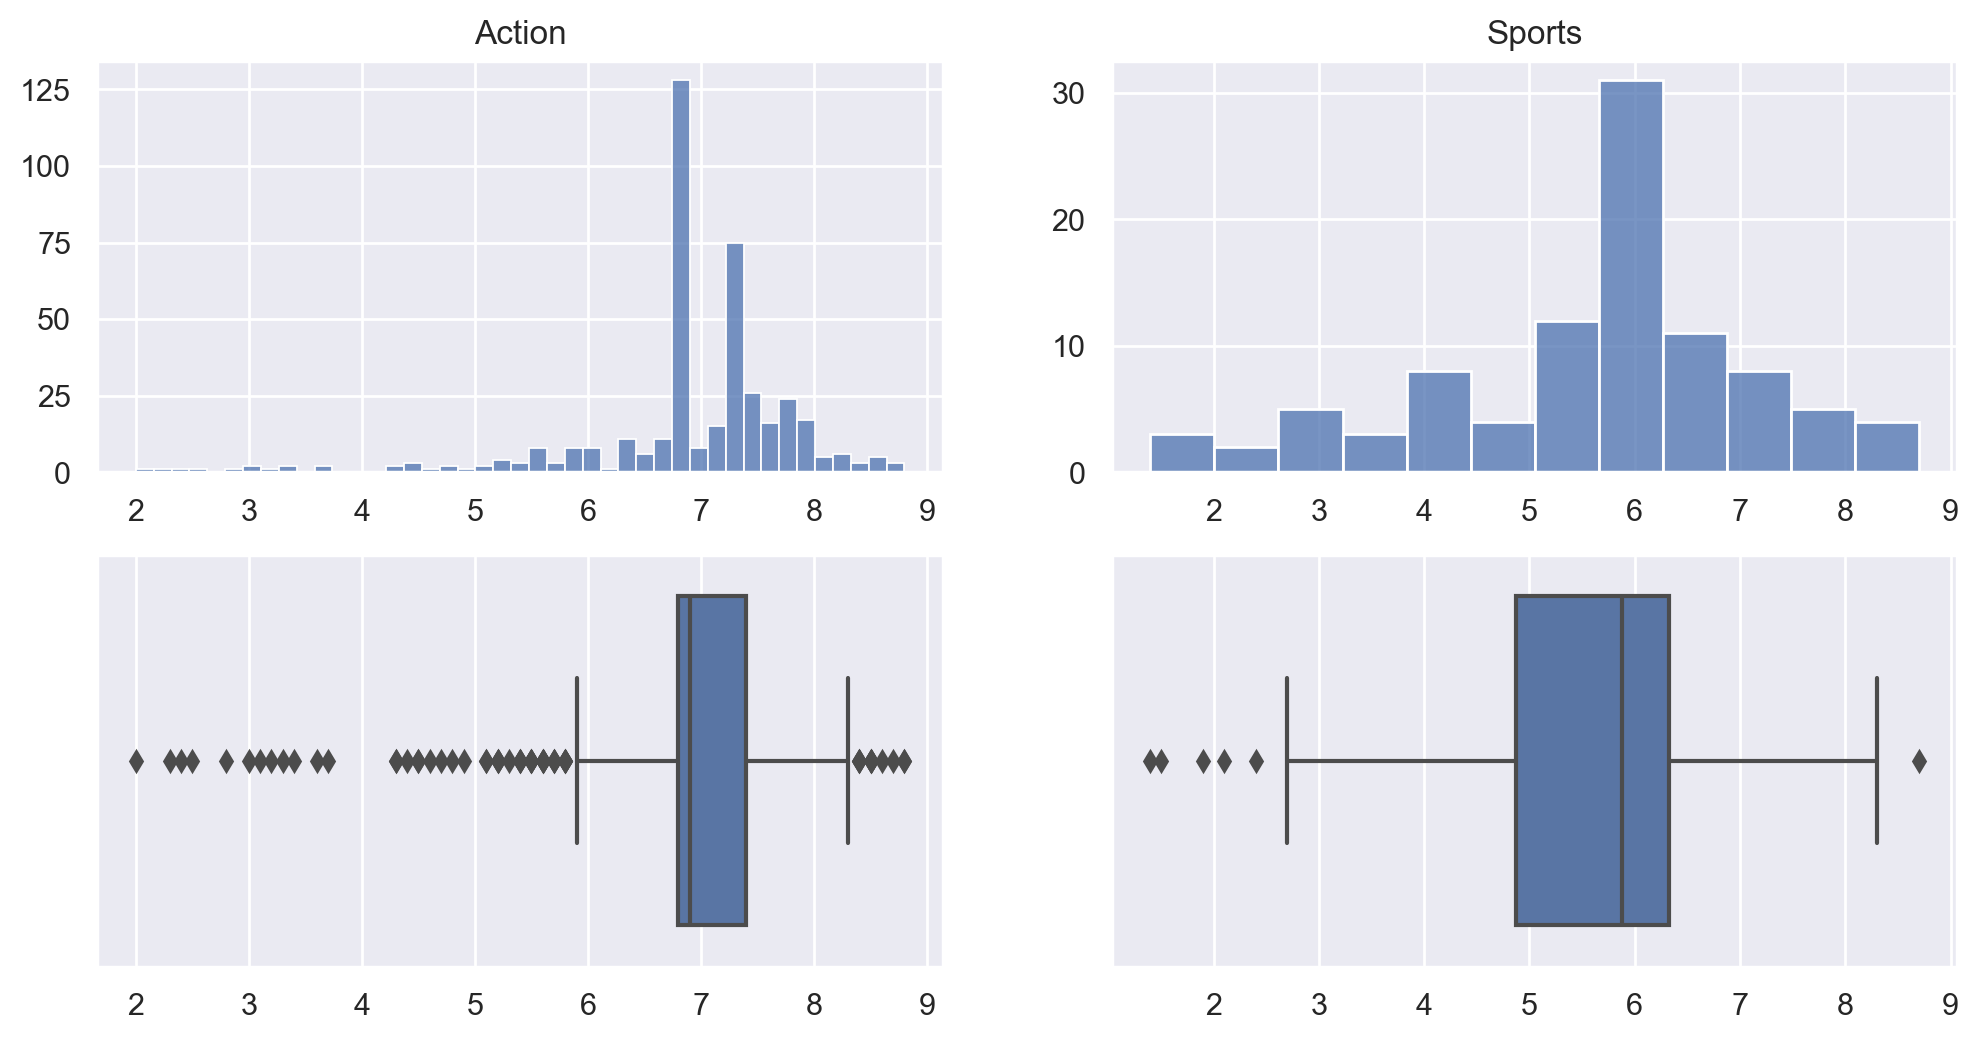

p-значение: 2.862945902067311e-12
Отвергаем нулевую гипотезу


In [113]:
t_test_ind(action_user_score, 
           sports_user_score, 
           equal_var=False, 
           title_array1='Action', 
           title_array2='Sports', 
           draw=True
          )

***Уберем выбросы для более точных расчетов***

In [114]:
action_user_score = action_user_score[(action_user_score > 6) & (action_user_score < 8.2)]
action_user_score.shape

(348,)

In [115]:
st.shapiro(action_user_score)

ShapiroResult(statistic=0.9379811882972717, pvalue=7.094699133736171e-11)

In [116]:
sports_user_score = sports_user_score[(sports_user_score > 3) & (sports_user_score < 8.2)]
sports_user_score.shape

(85,)

In [117]:
st.shapiro(sports_user_score)

ShapiroResult(statistic=0.9590692520141602, pvalue=0.008639109320938587)

In [118]:
t_test_ind(action_user_score, sports_user_score, equal_var=False)

p-значение: 2.6779836218996388e-18
Отвергаем нулевую гипотезу


*Проведенный тест показывает что нужно отвергнуть нулевую гипотезу в пользу альтернативной, о том что cредние пользовательские рейтинги жанров Action и Sports разные.*

### Вывод

Были проверены гипотезы, для этого использовался метод ttest_ind из пакета scipy.stats, который вычисляет t-критерий Стьюдента для средних двух генеральных совокупностей. Так как платформы и жанры в проверяемых гипотезах принципиально разные, не было оснований полагать что дисперсии у генеральных совокупностей одинаковые, поэтому аргумент equal_var был установлен False.

По результатам проверки выяснилось:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

**По результатам исследования рынка игр было выявлено:**

- Подъем выпуска игр начинается с 1992 года и достигает пика в 2009, после идет спад и момент стабилизации с 2013;
- В качестве актуального периода был выбран промежуток с 2013 по 2016 года;
- Характерный средний срок жизни платформы 9.5 лет;
- Самыми прибыльными оказались PS4, PS3, Xbox One, 3DS, X360, подкачали продажи у PC;
- Рост наблюдался только у PS4 и Xbox One, так как это самые новые консоли в представленном наборе данных, но в 2016 году они так же показали снижение, все остальные платформы падают от года к году;
- В качестве потенциально прибыльных платформ были выбраны PS4, Xbox One, 3DS, WiiU, PC, они являются самыми актуальными на 2016 год, у остальных платформ заканчивается срок поддержки;
- Зависимость продаж от оценки пользователей у потенциально прибыльных платформ либо отстутствовала, либо была очень слабой положительной, как у WiiU;
- Зависимость продаж от оценки критиков у 3DS и PC очень слабая положительная, WiiU, Xbox One имеют слабую зависимость как и PS4;
- У PS4, как у самой прибыльной из выбранных, больше всего продаж в жанрах Platform, Shooter и Sports, меньше всего игр с жанром Puzzle. У симуляторов среднее и медиана продаж практически одинаковые.

**Составление портрета пользователя для Северной Америки показал:**

- Самые популярные платформы это PS4, Xbox One, X360, PS3, 3DS;
- Большую долю рынка занимают самые новые консоли PS4, Xbox One, не отстает и консоль прошлого поколения X360;
- На продажи для X360 и Xbox One в Северной Америке приходится больше половины от мировых продаж;
- Самые популярные жанры - это action, shooter, sports, rpg, misc, это объясняется тем что в данные жанры удобно играть на консоле через геймпад, популярные платформы это подтверждают.

**Составление портрета пользователя для Европы показал:**

- Самые популярные платформы - это PS4, PS3, Xbox One, X360, 3DS;
- PS4 занимет целых 42.2% рынка Европы, за ним идет PS3 и уже потом все остальные;
- Продажи игр под PS4 в Европе занимают 45% от мировых, затем рынок почти поровну разделили остальные платформы;
- Самые популярные жанры - это action, shooter, sports, rpg, racing, это объясняется так же как и в Северной Америке, тем что в данные жанры удобно играть на консоле через геймпад.

**Составление портрета пользователя для Японии показал:**

- Самые популярные в Японии оказались отечественные платформы 3DS, PS3, PSV, PS4, WiiU;
- Портативная консоль 3DS занимает половину рынка, остальные платформы делять рынок практически в равных долях;
- Так как 3DS самая популярная платформа в Японии, на нее приходится половина от мировых продаж игр под нее, следом с еще большим размахом идет psv;
- Самые популярные жанры в JP это rpg, action, misc, fighting, shooter, во все эти жанры удобно играть на портативных консолях, которые так популярны в Японии.

*Рейтинг ESRB скорее не влияет чем влияет, больше всего продаж игр с рейтингом M - Mature, но так как игры в жанре action и shooter чаще всего получают именно его, то в этом нет ничего удивительного.*

**Проверка гипотез выявила, что:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Исходя из всего выше перечиленного можно сделать вывод:** 

1. Если планировать рекламную кампанию всего под одну платформу, то во всех регионах это будет PS4;
2. Если планирвоать кампании под разные регионы: 
 - В Северной Америке нужно сделать акцент на PS4 и Xbox One, так как это самые актуальные платформы на текущий момент, консоли предыдущего поколения со временем будут отходить№
 - В Европе акцентировать нужно на тоже, что и в Северной Америке;
 - В Японии кроме популярной PS4, нужно акцентировать так же и на портативные платформы 3DS и PSV.
3. В Качестве жанров во всех случаях нужно выбрать action, shooter, rpg.

**Так же хотелось бы отметить что в представленном наборе данных были пропуски и неправильные типы данных, большинство этих проблем удалось решить. Причины их появления скорее всего ошибка выгрузки или сбора данных.**